In [1]:
java_code_smells = read.csv("java_code_smells.csv", header = TRUE)
kotlin_code_smells = read.csv("kotlin_code_smells.csv", header = TRUE)

In [2]:
set.seed(37)
df_java_projects_ran <- java_code_smells[sample(nrow(java_code_smells)),]
df_kotlin_projects_ran <- kotlin_code_smells[sample(nrow(kotlin_code_smells)),]

Dividing into training and test data.

In [3]:
df_java_projects_training <- df_java_projects_ran[1:400,]
df_kotlin_projects_training <- df_kotlin_projects_ran[1:400,]

In [4]:
rownames(df_java_projects_training) <- NULL
rownames(df_kotlin_projects_training) <- NULL

In [5]:
df_java_projects_training

Project,LF,LPL,TMM,Total,Lifespan,Issues,LOC,Commits,Contributors,Stargazers
changmingxie/tcc-transaction,3,102,15,120,1086,159,7259,173,8,2775
Tencent/VasSonic,1,67,16,84,481,2,9987,365,19,8824
kbastani/spring-cloud-microservice-example,0,0,1,1,1285,21,1229,51,9,2504
siacs/Conversations,7,390,92,489,1766,331,54505,5483,140,3069
siyamed/android-shape-imageview,0,51,3,54,1547,52,2795,82,5,2286
android-cjj/Android-MaterialRefreshLayout,0,19,9,28,1173,75,3342,90,7,2079
rubensousa/RecyclerViewSnap,0,10,1,11,816,2,873,87,4,3788
checkstyle/checkstyle,618,542,381,1541,1912,486,239801,9961,232,4037
springside/springside4,0,92,47,139,2467,71,17902,1076,29,5479
dbeaver/dbeaver,81,3114,334,3529,1131,755,368544,10821,86,6674


# Correlation Matrices

## Java

In [6]:
java_projects_training_w_projects <- subset(df_java_projects_training, select = c(2,3,4,5,6,7,8,9,10,11))
res <- cor(java_projects_training_w_projects)
round(res, 2)

,LF,LPL,TMM,Total,Lifespan,Issues,LOC,Commits,Contributors,Stargazers
LF,1.00,0.44,0.58,0.56,0.20,0.31,0.61,0.25,0.37,0.12
LPL,0.44,1.00,0.93,0.99,0.27,0.33,0.91,0.76,0.71,0.14
TMM,0.58,0.93,1.00,0.97,0.29,0.45,0.96,0.70,0.73,0.20
Total,0.56,0.99,0.97,1.00,0.28,0.37,0.94,0.74,0.72,0.16
Lifespan,0.20,0.27,0.29,0.28,1.00,0.30,0.28,0.25,0.39,0.17
Issues,0.31,0.33,0.45,0.37,0.30,1.00,0.36,0.16,0.32,0.38
LOC,0.61,0.91,0.96,0.94,0.28,0.36,1.00,0.79,0.77,0.18
Commits,0.25,0.76,0.70,0.74,0.25,0.16,0.79,1.00,0.87,0.12
Contributors,0.37,0.71,0.73,0.72,0.39,0.32,0.77,0.87,1.00,0.30
Stargazers,0.12,0.14,0.20,0.16,0.17,0.38,0.18,0.12,0.30,1.00


## Kotlin

In [7]:
kotlin_projects_training_w_projects <- subset(df_kotlin_projects_training, select = c(2,3,4,5,6,7,8,9,10,11))
res <- cor(kotlin_projects_training_w_projects)
round(res, 2)

,LF,LPL,TMM,Total,Lifespan,Issues,LOC,Commits,Contributors,Stargazers
LF,1.00,0.58,0.24,0.65,0.04,0.06,0.47,0.30,0.09,0.03
LPL,0.58,1.00,0.71,0.99,0.14,0.29,0.71,0.52,0.38,0.06
TMM,0.24,0.71,1.00,0.78,0.19,0.40,0.84,0.75,0.45,0.09
Total,0.65,0.99,0.78,1.00,0.15,0.31,0.78,0.60,0.39,0.07
Lifespan,0.04,0.14,0.19,0.15,1.00,0.21,0.17,0.28,0.24,0.22
Issues,0.06,0.29,0.40,0.31,0.21,1.00,0.35,0.41,0.48,0.13
LOC,0.47,0.71,0.84,0.78,0.17,0.35,1.00,0.83,0.51,0.14
Commits,0.30,0.52,0.75,0.60,0.28,0.41,0.83,1.00,0.64,0.25
Contributors,0.09,0.38,0.45,0.39,0.24,0.48,0.51,0.64,1.00,0.42
Stargazers,0.03,0.06,0.09,0.07,0.22,0.13,0.14,0.25,0.42,1.00


In [8]:
library(devtools)
library(easyGgplot2)

Loading required package: ggplot2


In [9]:
#p95 <- quantile(df_java_projects_training$Total, 0.4)
#p05 <- quantile(df_java_projects_training$Total, 0.0)
#df_java_projects_training <- df_java_projects_training[df_java_projects_training$Total  < p95, ]
#df_java_projects_training <- df_java_projects_training[df_java_projects_training$Total  > p05, ]
#df_java_projects_training <- df_java_projects_training[df_java_projects_training$LOC  < 25000, ]
#df_java_projects_training <- df_java_projects_training[df_java_projects_training$LOC  > 5000, ]
NROW(df_java_projects_training)

[1] 400

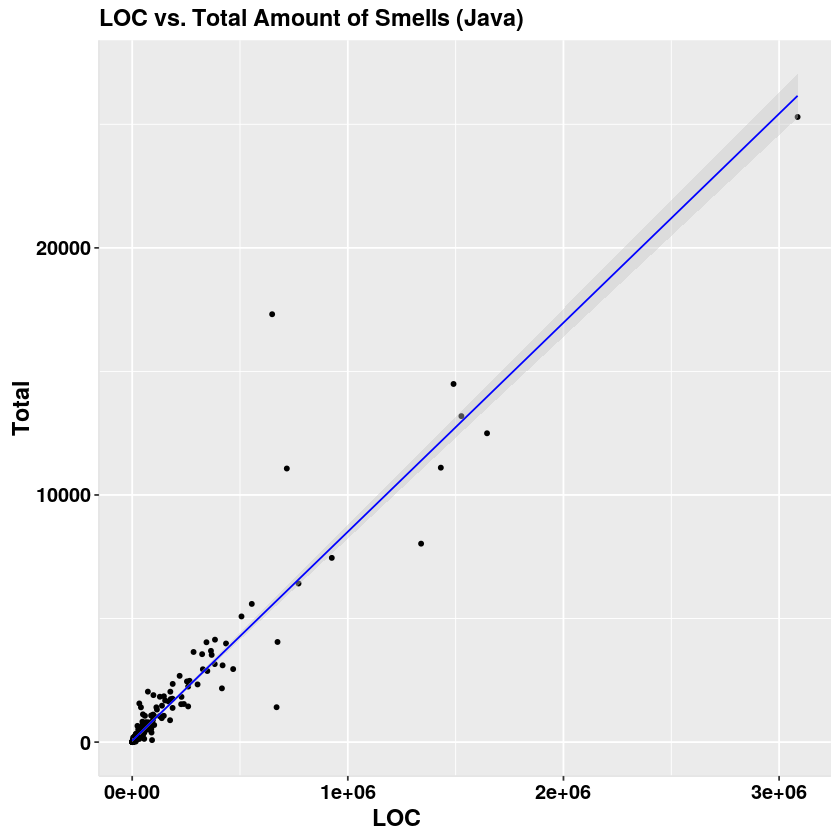

In [10]:
ggplot2.scatterplot(data=df_java_projects_training, xName='LOC',yName='Total',
            addRegLine=TRUE, regLineColor="blue",
            addConfidenceInterval=TRUE) + ggtitle("LOC vs. Total Amount of Smells (Java)")

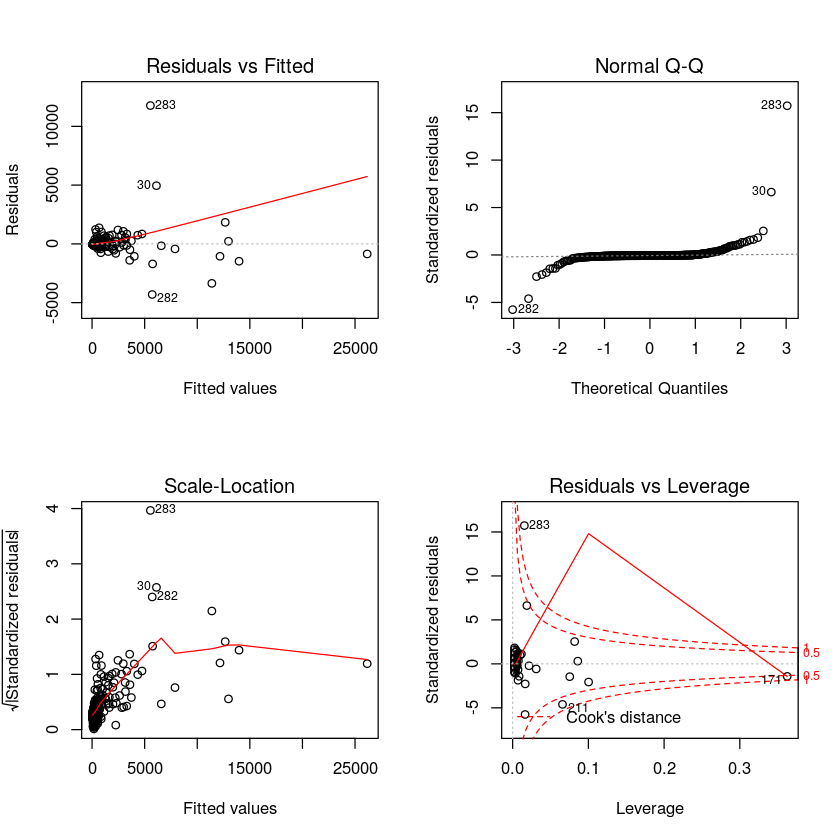

In [11]:
fit <- lm(Total ~ LOC, data=df_java_projects_training)
par(mfrow=c(2,2))
plot(fit)

In [12]:
fit <- lm(df_java_projects_training$Total ~ df_java_projects_training$LOC)

In [13]:
residuals <- resid(fit)

In [14]:
head(residuals)

1          2          3          4          5          6 
  2.699313 -56.373726 -65.299799 -27.900677 -25.544806 -56.171255

In [15]:
shapiro.test(residuals)


	Shapiro-Wilk normality test

data:  residuals
W = 0.26969, p-value < 2.2e-16


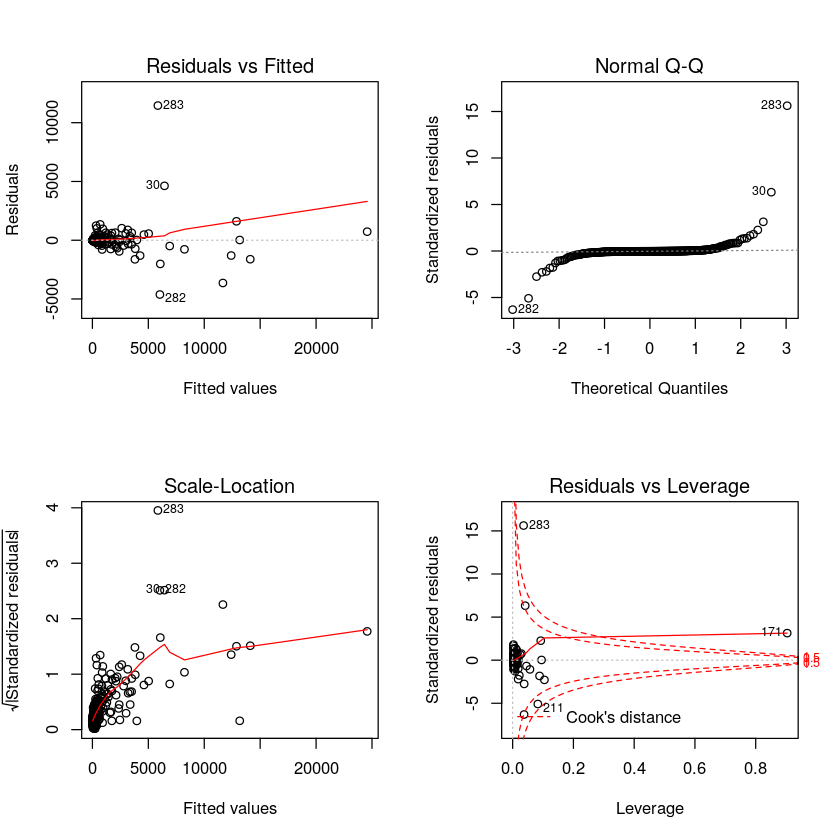

In [16]:
polynomial_fit <- lm(Total ~ LOC + I(LOC^2), data=df_java_projects_training)
par(mfrow=c(2,2))
plot(polynomial_fit)

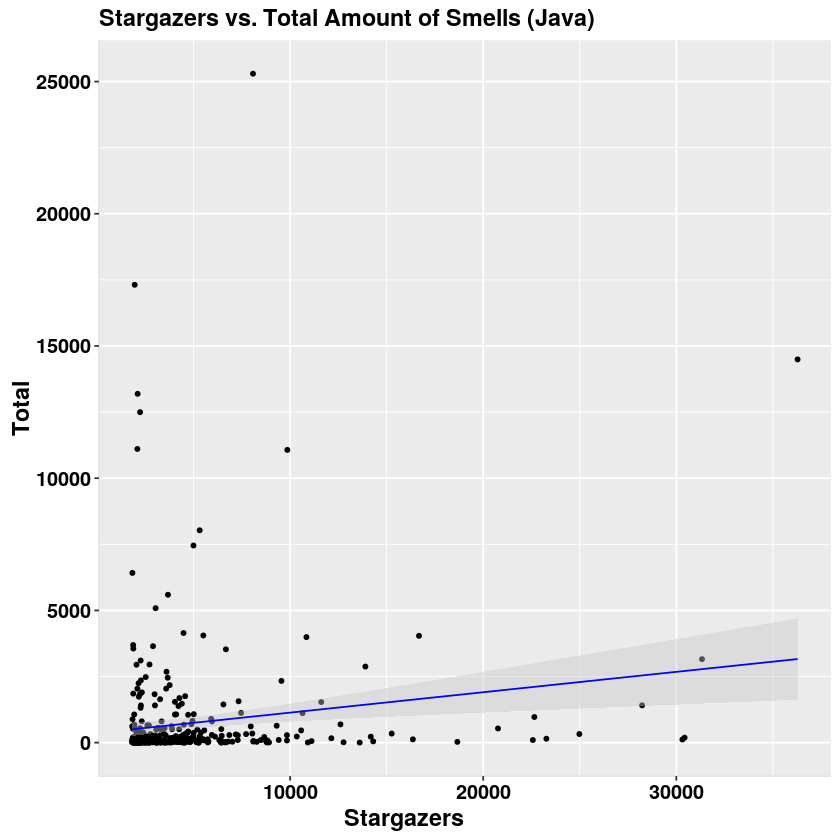

In [17]:
ggplot2.scatterplot(data=df_java_projects_training, xName='Stargazers',yName='Total', addRegLine=TRUE, regLineColor="blue", addConfidenceInterval=TRUE) + ggtitle("Stargazers vs. Total Amount of Smells (Java)")

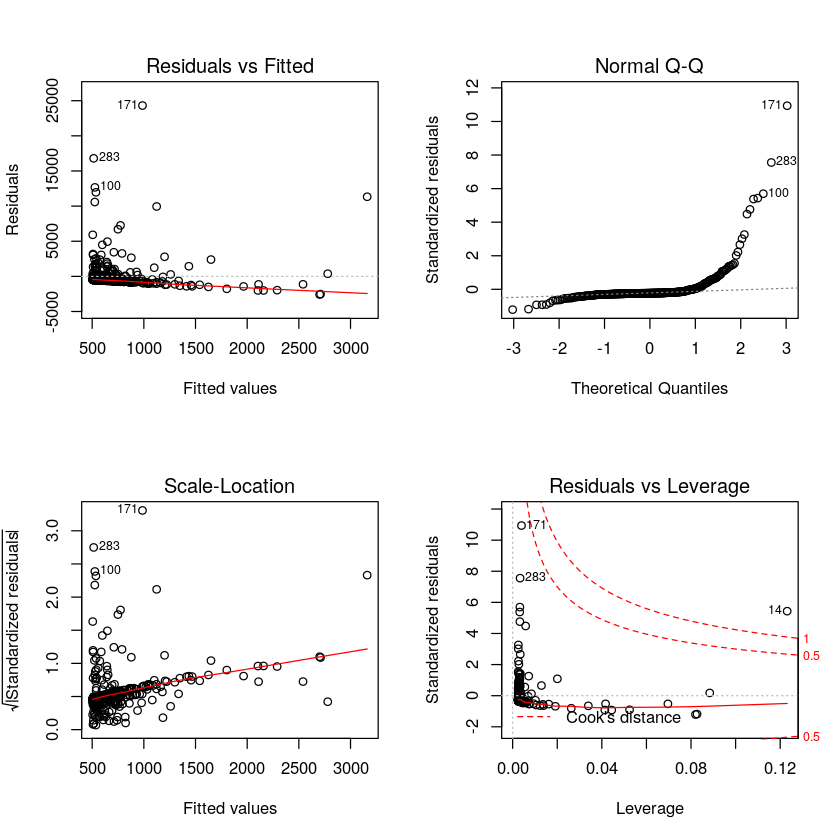

In [18]:
fit <- lm(Total ~ Stargazers, data=df_java_projects_training)
par(mfrow=c(2,2))
plot(fit)

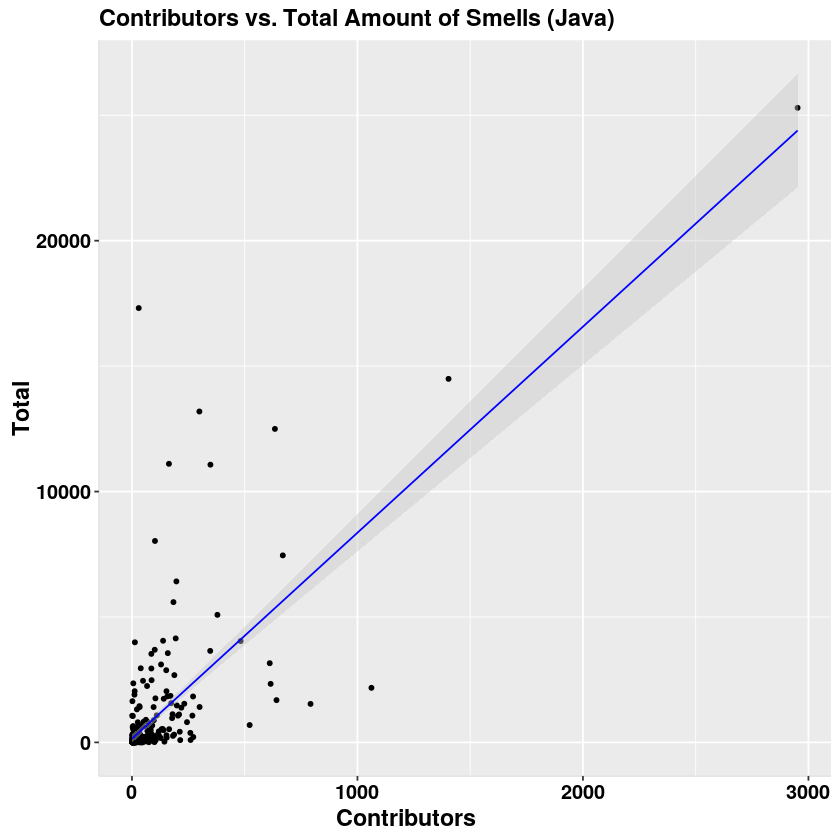

In [19]:
ggplot2.scatterplot(data=df_java_projects_training, xName='Contributors',yName='Total', addRegLine=TRUE, regLineColor="blue", addConfidenceInterval=TRUE) + ggtitle("Contributors vs. Total Amount of Smells (Java)")

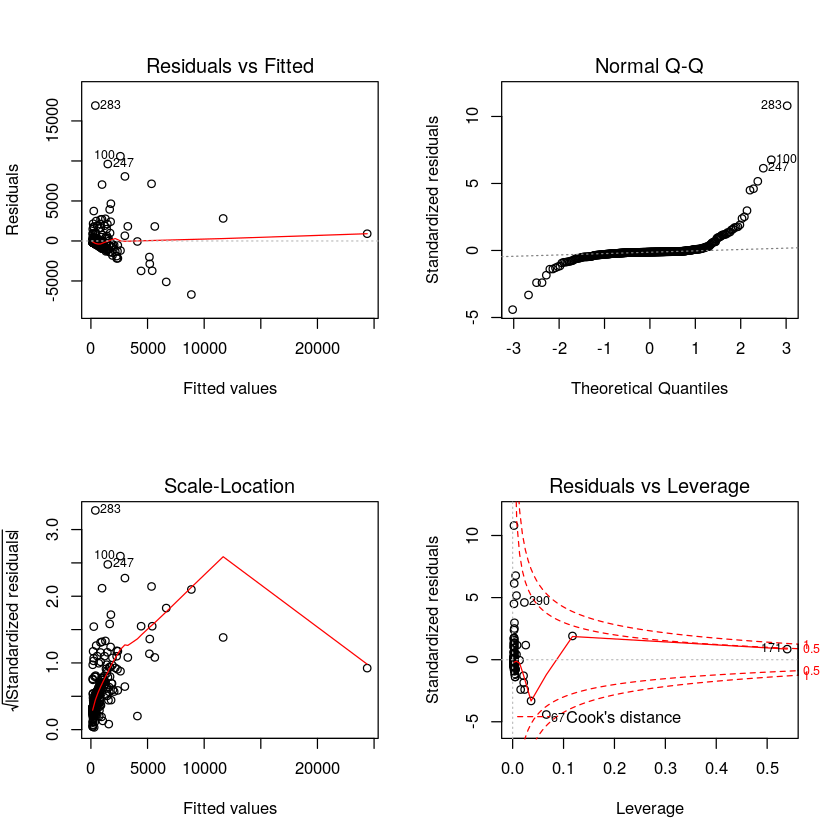

In [20]:
fit <- lm(Total ~ Contributors, data=df_java_projects_training)
par(mfrow=c(2,2))
plot(fit)

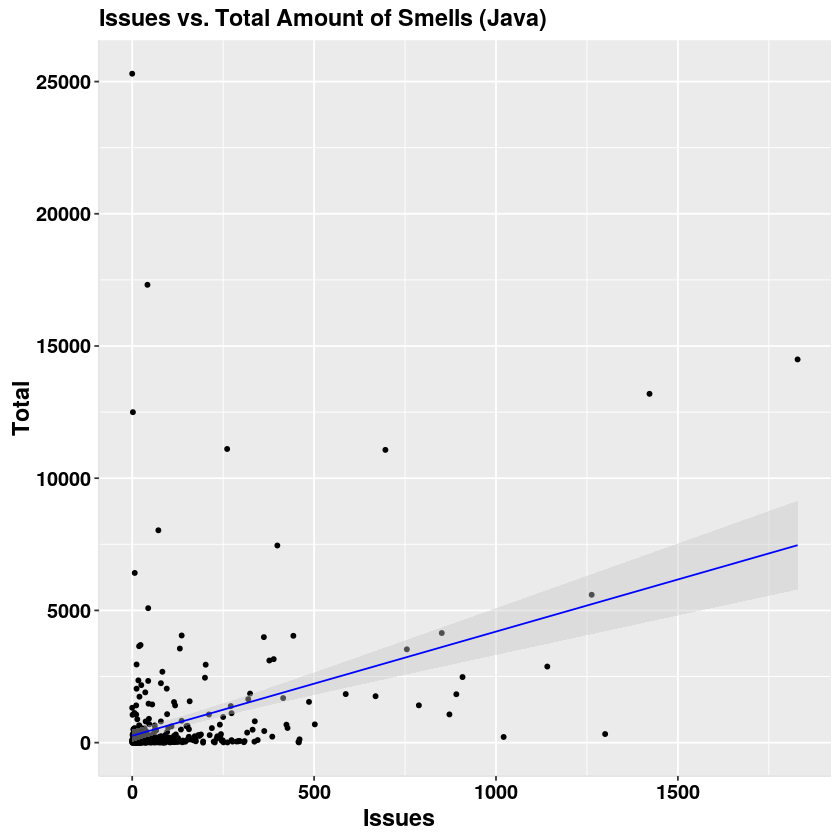

In [21]:
ggplot2.scatterplot(data=df_java_projects_training, xName='Issues',yName='Total', addRegLine=TRUE, regLineColor="blue", addConfidenceInterval=TRUE) + ggtitle("Issues vs. Total Amount of Smells (Java)")

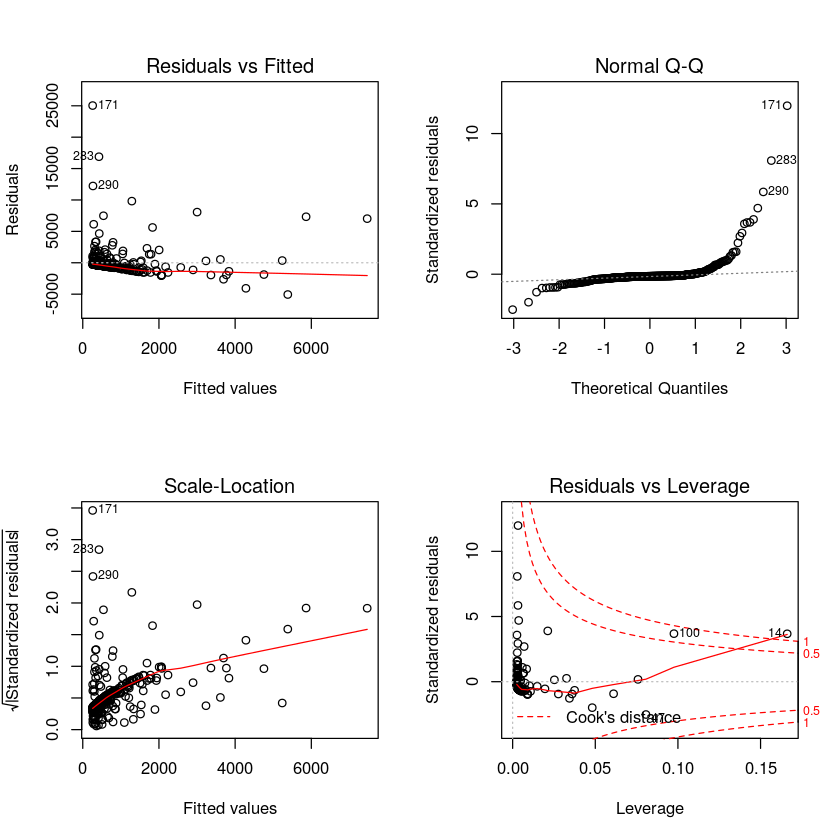

In [22]:
fit <- lm(Total ~ Issues, data=df_java_projects_training)
par(mfrow=c(2,2))
plot(fit)

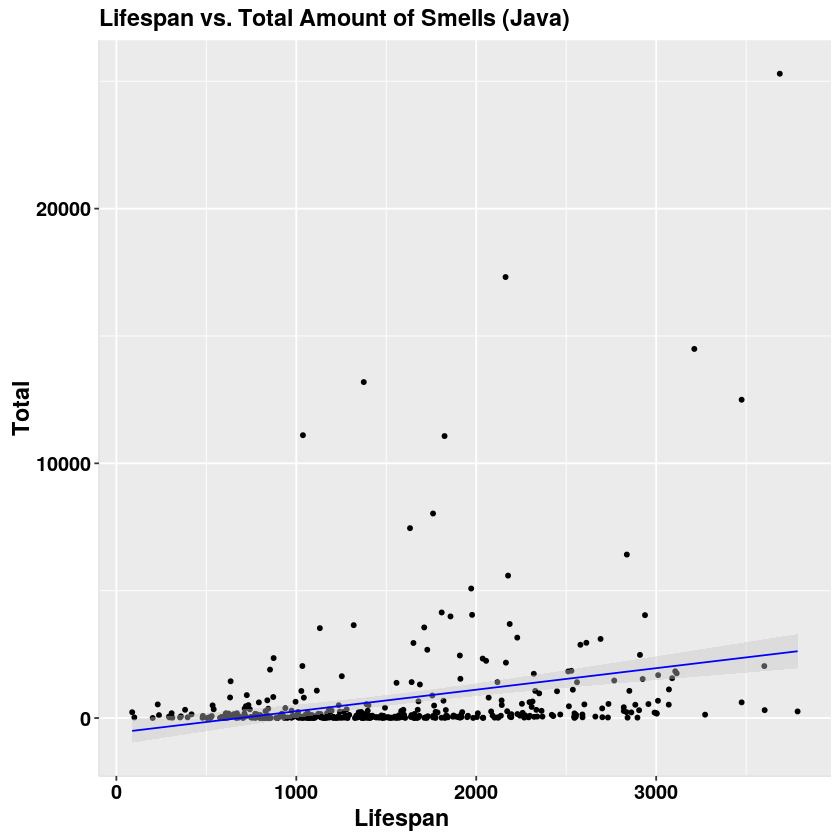

In [23]:
ggplot2.scatterplot(data=df_java_projects_training, xName='Lifespan',yName='Total', addRegLine=TRUE, regLineColor="blue", addConfidenceInterval=TRUE) + ggtitle("Lifespan vs. Total Amount of Smells (Java)")

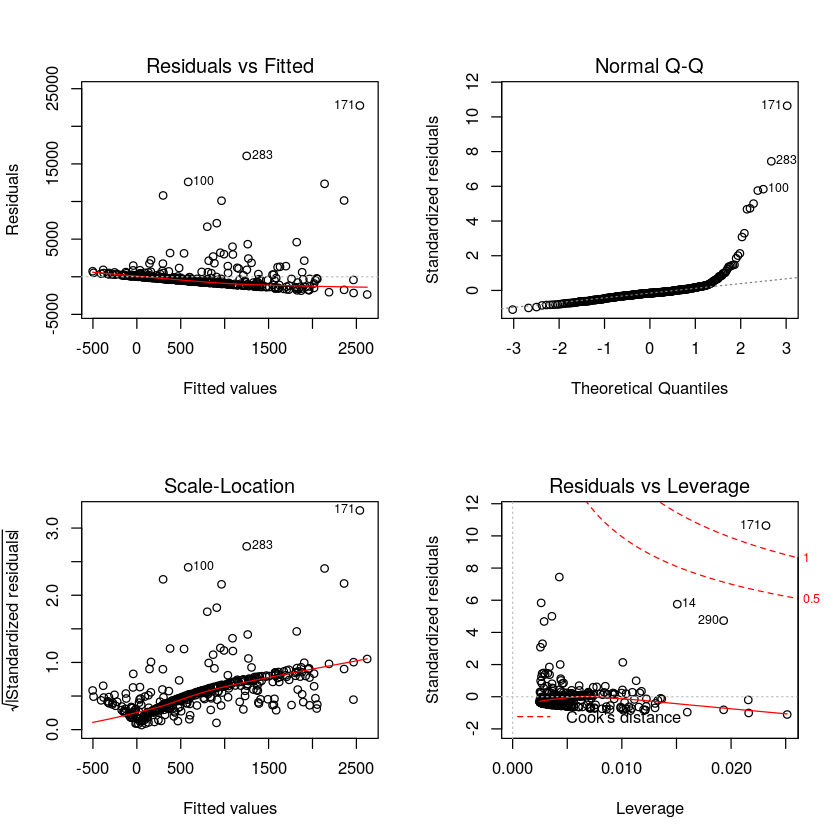

In [24]:
fit <- lm(Total ~ Lifespan, data=df_java_projects_training)
par(mfrow=c(2,2))
plot(fit)

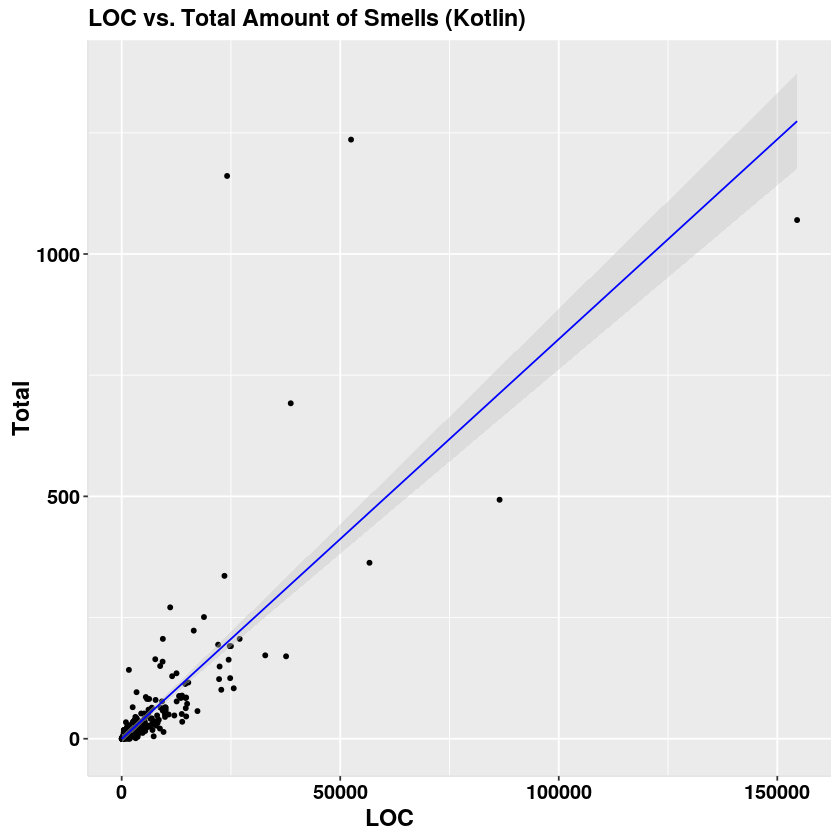

In [25]:
ggplot2.scatterplot(data=df_kotlin_projects_training, xName='LOC',yName='Total',
            addRegLine=TRUE, regLineColor="blue",
            addConfidenceInterval=TRUE) + ggtitle("LOC vs. Total Amount of Smells (Kotlin)")

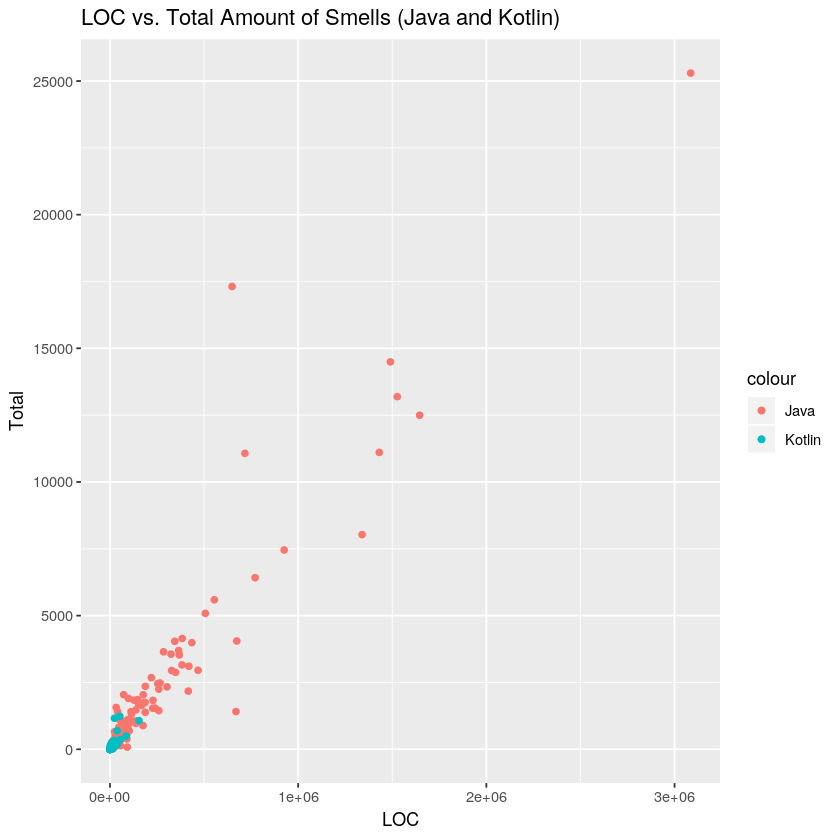

In [26]:
LOC <- df_java_projects_training$LOC
Total <- df_java_projects_training$Total

ggplot() +
  geom_point(data=df_java_projects_training, aes(LOC, Total, color= 'Java')) +
  geom_point(data=df_kotlin_projects_training, aes(df_kotlin_projects_training$LOC, df_kotlin_projects_training$Total, color= 'Kotlin')) + ggtitle("LOC vs. Total Amount of Smells (Java and Kotlin)")

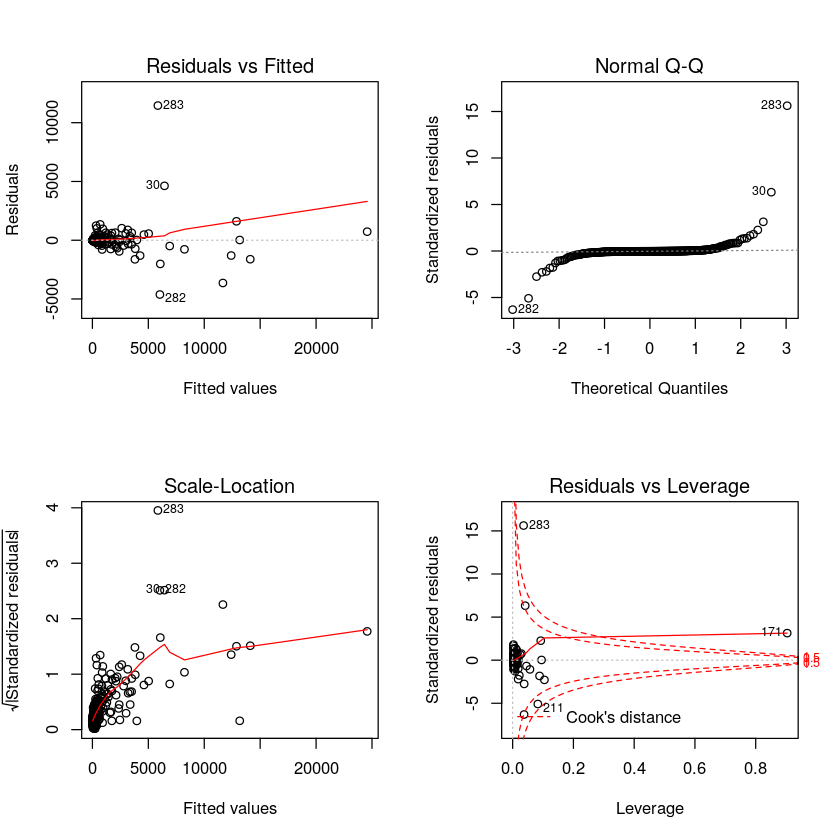

In [27]:
polynomial_fit <- lm(Total ~ LOC + I(LOC^2), data=df_java_projects_training)
par(mfrow=c(2,2))
plot(polynomial_fit)

# Multidimensional Regression

## Java

In [28]:
fit <- lm(Total ~ LOC + Stargazers + Contributors + Issues + Lifespan, data=df_java_projects_training)
summary(fit)


Call:
lm(formula = Total ~ LOC + Stargazers + Contributors + Issues + 
    Lifespan, data = df_java_projects_training)

Residuals:
    Min      1Q  Median      3Q     Max 
-4266.8   -90.5   -34.6     5.8 11728.9 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.3852670 93.4249598  -0.036   0.9711    
LOC           0.0084549  0.0002428  34.817   <2e-16 ***
Stargazers   -0.0119242  0.0092200  -1.293   0.1967    
Contributors -0.2191611  0.3213385  -0.682   0.4956    
Issues        0.4270415  0.2076154   2.057   0.0404 *  
Lifespan      0.0520906  0.0557150   0.935   0.3504    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 751.3 on 394 degrees of freedom
Multiple R-squared:  0.8901,	Adjusted R-squared:  0.8887 
F-statistic: 638.2 on 5 and 394 DF,  p-value: < 2.2e-16


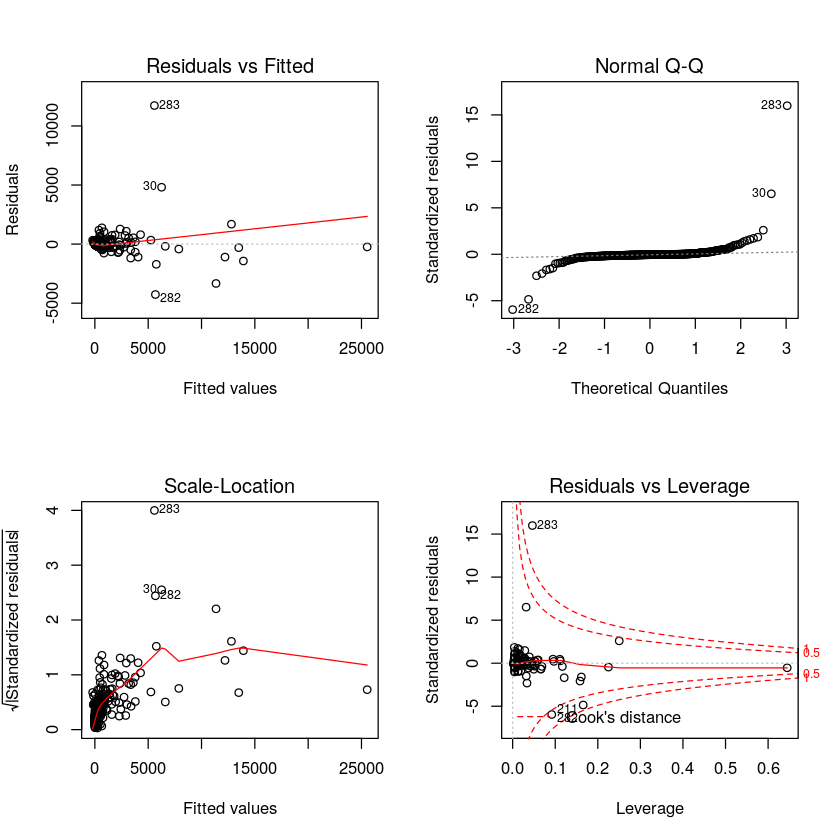

In [29]:
fit <- lm(Total ~ LOC + Stargazers + Contributors + Issues + Lifespan, data=df_java_projects_training)
par(mfrow=c(2,2))
plot(fit)

In [30]:
rownames(df_java_projects_training) <- NULL

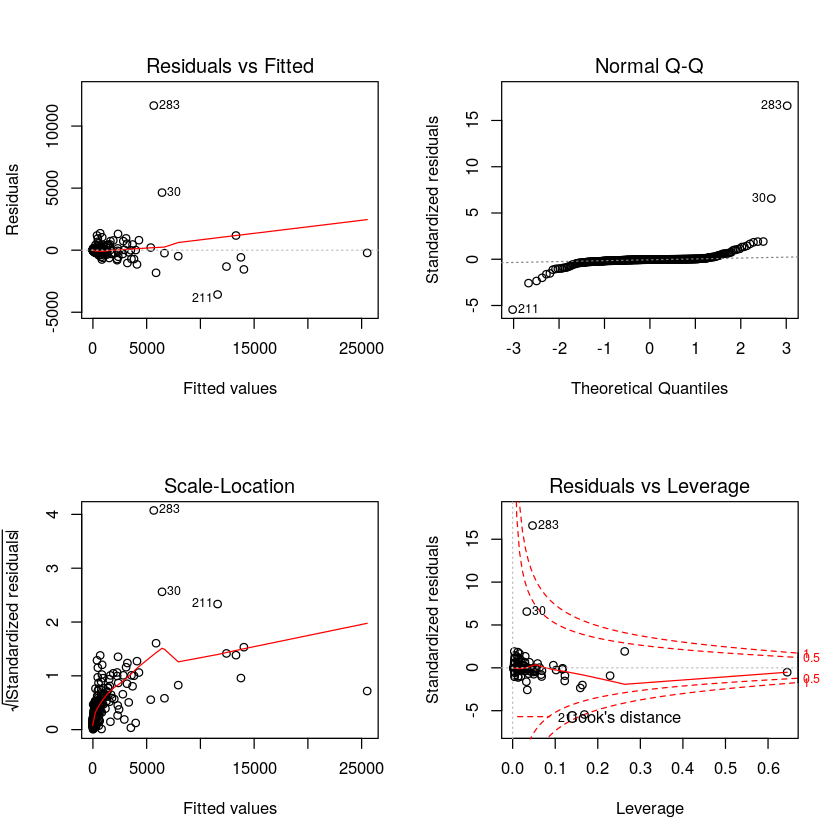

In [31]:
fit <- lm(Total ~ LOC + Stargazers + Contributors + Issues + Lifespan, df_java_projects_training[-c(282, 217, 213),])
par(mfrow=c(2,2))
plot(fit)

# Kotlin

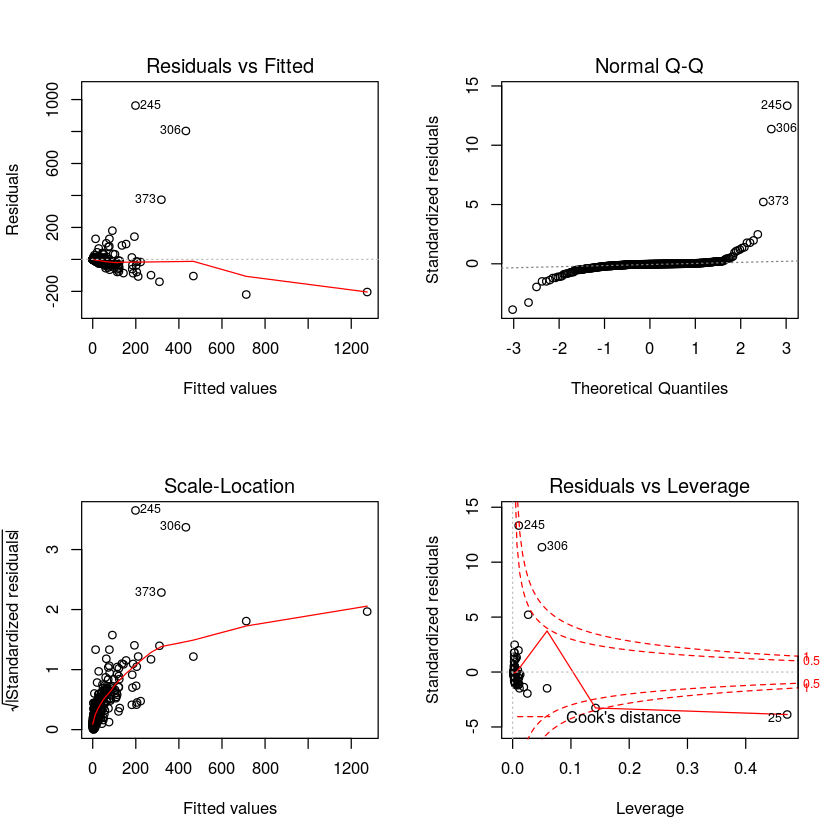

In [32]:
fit <- lm(Total ~ LOC, data=df_kotlin_projects_training)
par(mfrow=c(2,2))
plot(fit)

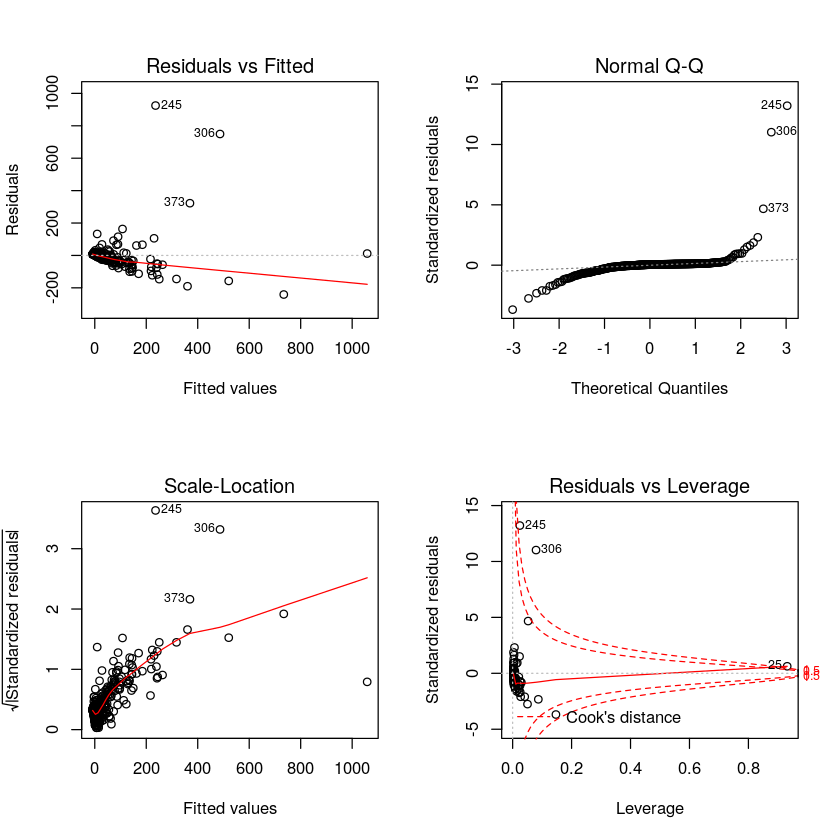

In [33]:
polynomial_fit <- lm(Total ~ LOC + I(LOC^2), data=df_kotlin_projects_training)
par(mfrow=c(2,2))
plot(polynomial_fit)

# Box Cox Transformation

## Java

In [34]:
library('MASS')

In [35]:
df_java_projects_training <- df_java_projects_training[df_java_projects_training$Total != 0, ]
df_java_projects_training <- df_java_projects_training[df_java_projects_training$Issues != 0, ]

lambda,lik
-0.06060606,-1159.747
-0.10101010,-1159.915
-0.02020202,-1160.357
-0.14141414,-1160.836
0.02020202,-1161.774
-0.18181818,-1162.485
0.06060606,-1164.029
-0.22222222,-1164.841
0.10101010,-1167.160
-0.26262626,-1167.880


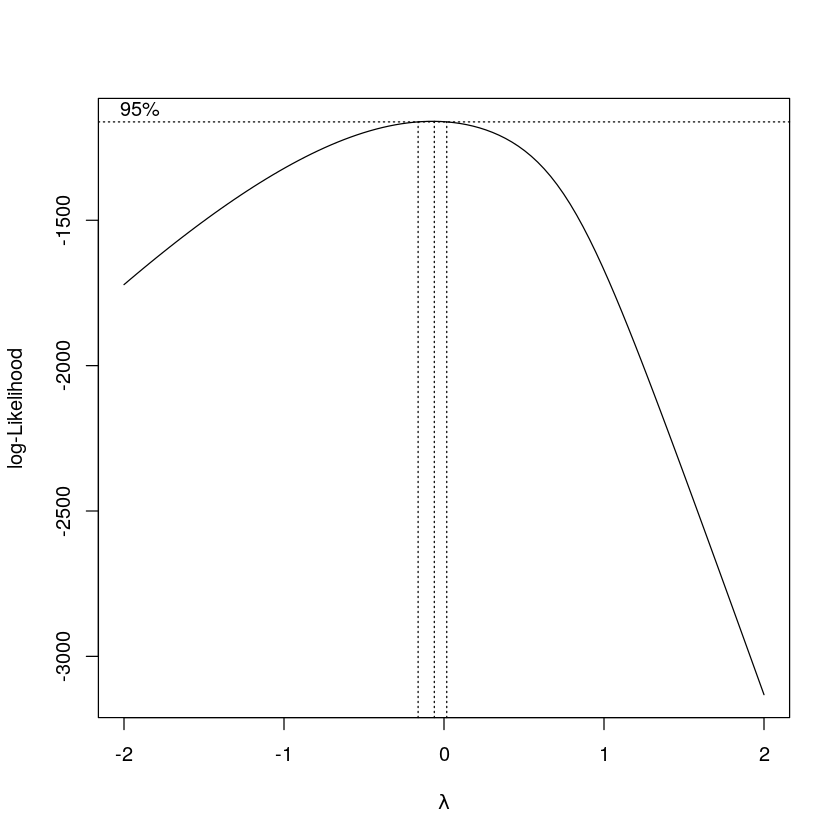

In [36]:
b=boxcox(LOC + Stargazers + Contributors + Issues + Lifespan~Total , data=df_java_projects_training)
lambda=b$x
lik=b$y
bc=cbind(lambda,lik)
bc[order(-lik),]

In [37]:
#df_java_projects_training$Total <- log(df_java_projects_training$Total)

In [38]:
#fit <- lm(Total ~ log(LOC) + log(Stargazers) + log(Contributors) + log(Issues) + log(Lifespan), df_java_projects_training)
#par(mfrow=c(2,2))
#plot(fit)

In [39]:
box_cox = function(y, x, data){ 
  b=boxcox(y~x, data=data)
  lambda=b$x
  lik=b$y
  bc=cbind(lambda,lik)
  bc[order(-lik),]
}

[1] "x=LOC, y=Total, df=df_java_projects_training"


lambda,lik
0.10101010,-1328.198
0.14141414,-1328.209
0.06060606,-1330.218
0.18181818,-1330.223
0.22222222,-1334.218
0.02020202,-1334.310
0.26262626,-1340.194
-0.02020202,-1340.516
0.30303030,-1348.175
-0.06060606,-1348.876


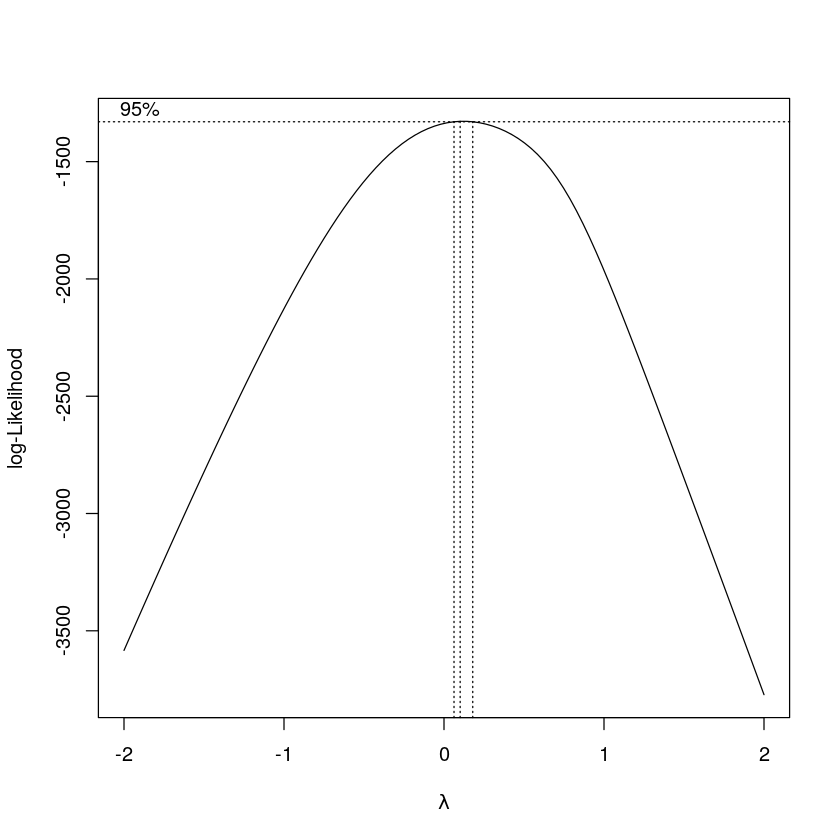

In [40]:
print('x=LOC, y=Total, df=df_java_projects_training')
box_cox(df_java_projects_training$Total, df_java_projects_training$LOC, df_java_projects_training)

[1] "x=Stargazers, y=Total, df=df_java_projects_training"


lambda,lik
-0.06060606,-1414.140
-0.02020202,-1415.161
-0.10101010,-1416.277
0.02020202,-1419.349
-0.14141414,-1421.555
0.06060606,-1426.699
-0.18181818,-1429.936
0.10101010,-1437.189
-0.22222222,-1441.377
0.14141414,-1450.792


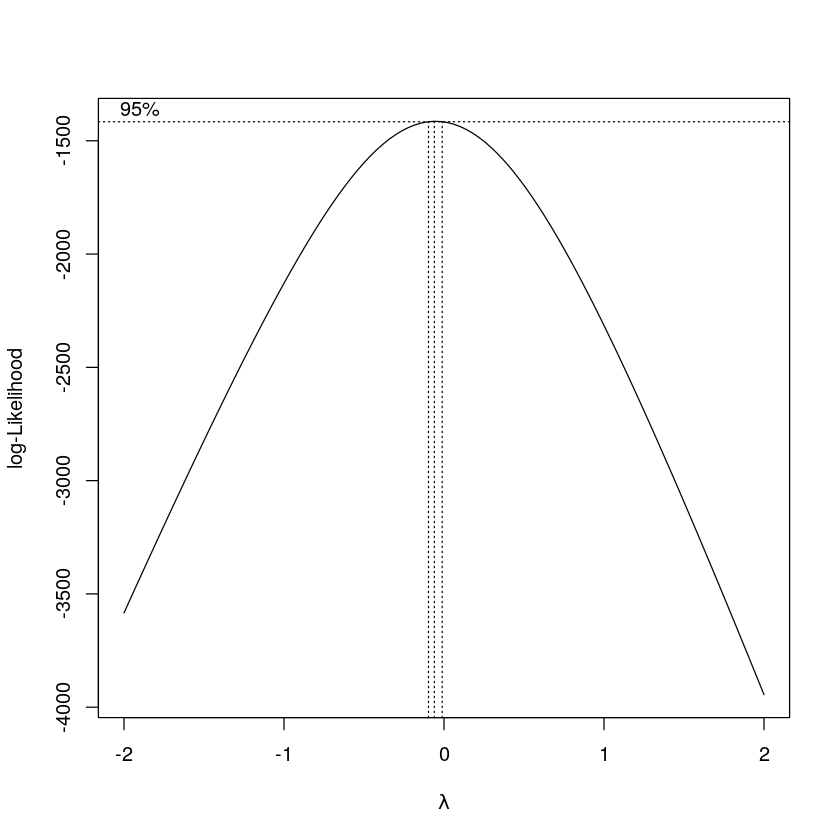

In [41]:
print('x=Stargazers, y=Total, df=df_java_projects_training')
box_cox(df_java_projects_training$Total, df_java_projects_training$Stargazers, df_java_projects_training)

[1] "x=Contributors, y=Total, df=df_java_projects_training"


lambda,lik
-0.02020202,-1366.179
0.02020202,-1366.226
-0.06060606,-1369.253
0.06060606,-1369.451
-0.10101010,-1375.382
0.10101010,-1375.905
-0.14141414,-1384.498
0.14141414,-1385.631
-0.18181818,-1396.531
0.18181818,-1398.651


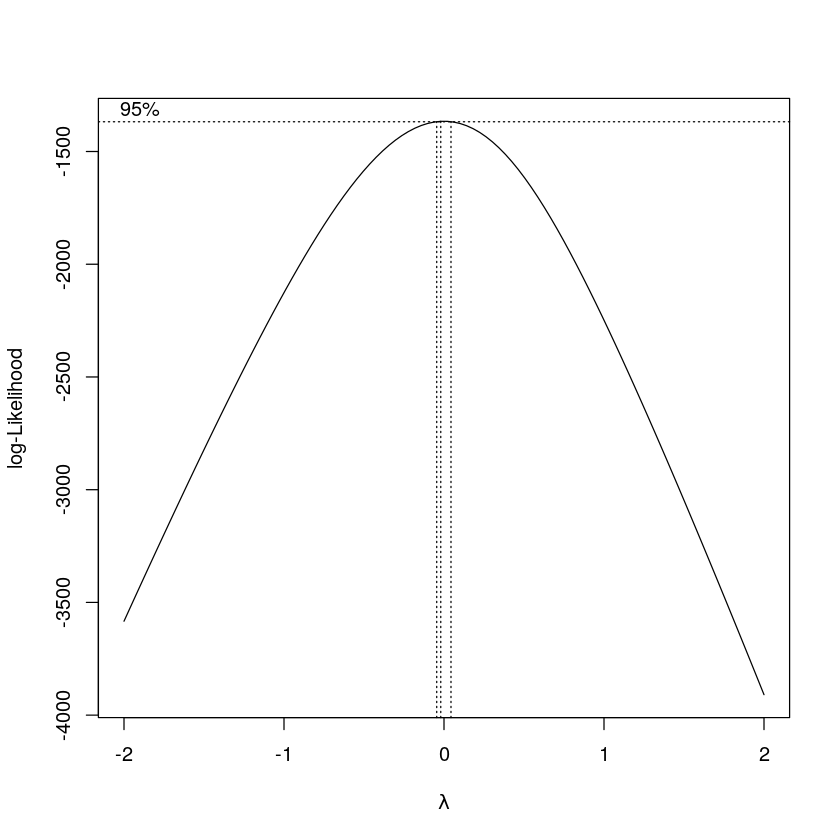

In [42]:
print('x=Contributors, y=Total, df=df_java_projects_training')
box_cox(df_java_projects_training$Total, df_java_projects_training$Contributors, df_java_projects_training)

[1] "x=Issues, y=Total, df=df_java_projects_training"


lambda,lik
-0.02020202,-1387.048
-0.06060606,-1388.186
0.02020202,-1389.054
-0.10101010,-1392.430
0.06060606,-1394.227
-0.14141414,-1399.739
0.10101010,-1402.580
-0.18181818,-1410.059
0.14141414,-1414.117
-0.22222222,-1423.331


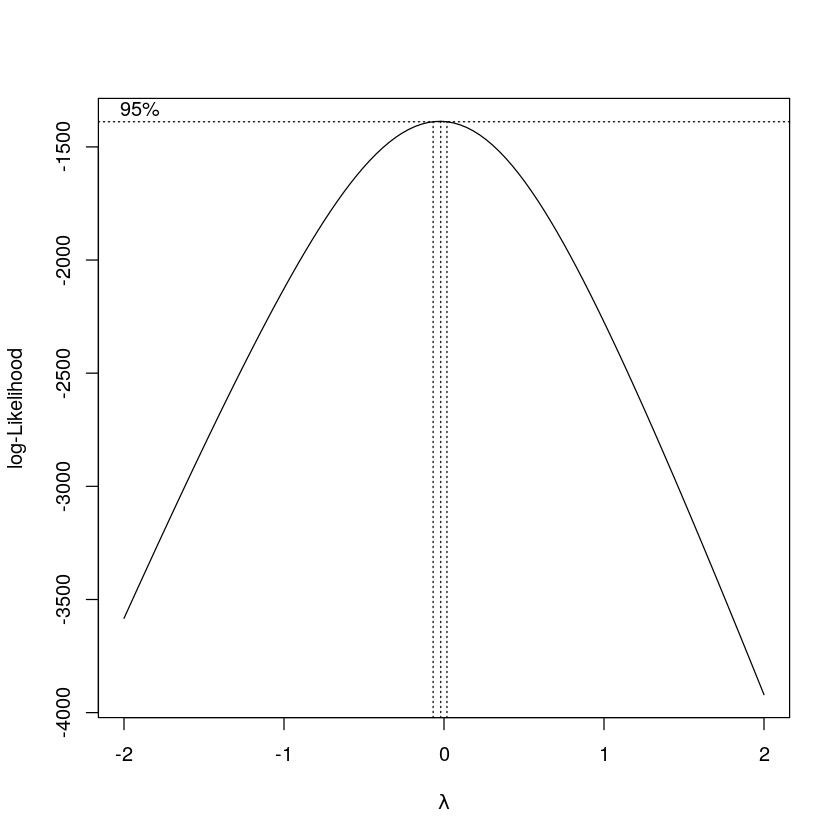

In [43]:
print('x=Issues, y=Total, df=df_java_projects_training')
box_cox(df_java_projects_training$Total, df_java_projects_training$Issues, df_java_projects_training)

[1] "x=Lifespan, y=Total, df=df_java_projects_training"


lambda,lik
-0.06060606,-1393.710
-0.02020202,-1394.237
-0.10101010,-1396.448
0.02020202,-1398.054
-0.14141414,-1402.420
0.06060606,-1405.166
-0.18181818,-1411.571
0.10101010,-1415.560
-0.22222222,-1423.839
0.14141414,-1429.211


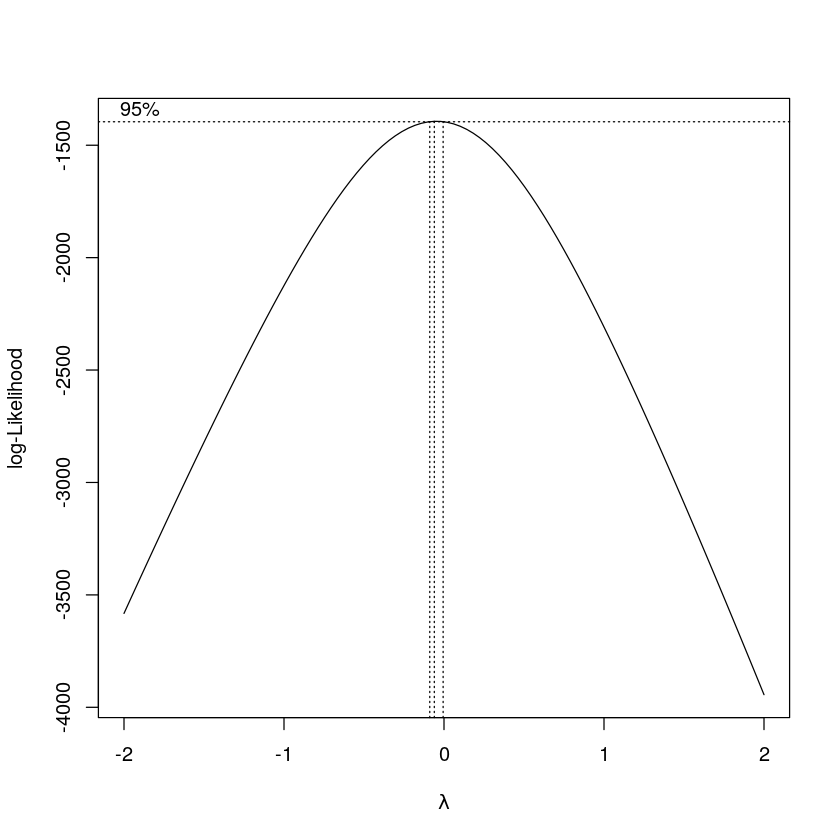

In [44]:
print('x=Lifespan, y=Total, df=df_java_projects_training')
box_cox(df_java_projects_training$Total, df_java_projects_training$Lifespan, df_java_projects_training)

## Kotlin

In [45]:
df_kotlin_projects_training <- df_kotlin_projects_training[df_kotlin_projects_training$Total != 0, ]

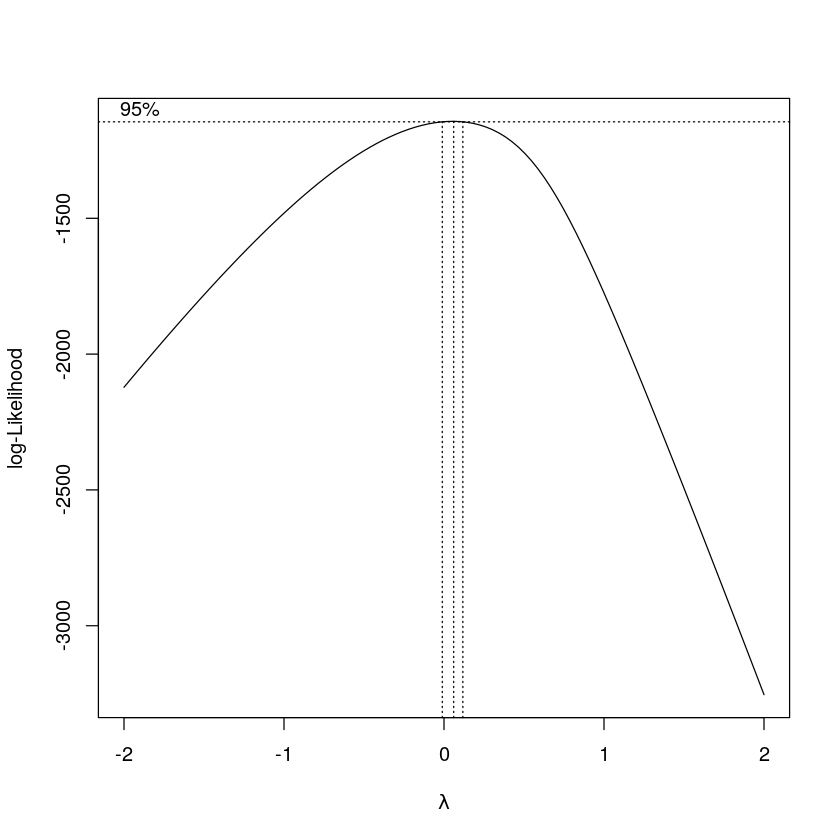

In [46]:
b_kotlin=boxcox(Total ~ LOC, data=df_kotlin_projects_training)

In [47]:
lambda=b_kotlin$x
lik=b_kotlin$y
bc=cbind(lambda,lik)
bc[order(-lik),]

lambda,lik
0.06060606,-1143.022
0.02020202,-1143.530
0.10101010,-1143.934
-0.02020202,-1145.377
0.14141414,-1146.356
-0.06060606,-1148.491
0.18181818,-1150.409
-0.10101010,-1152.816
0.22222222,-1156.220
-0.14141414,-1158.299


In [48]:
head(df_java_projects_training)

Project,LF,LPL,TMM,Total,Lifespan,Issues,LOC,Commits,Contributors,Stargazers
changmingxie/tcc-transaction,3,102,15,120,1086,159,7259,173,8,2775
Tencent/VasSonic,1,67,16,84,481,2,9987,365,19,8824
kbastani/spring-cloud-microservice-example,0,0,1,1,1285,21,1229,51,9,2504
siacs/Conversations,7,390,92,489,1766,331,54505,5483,140,3069
siyamed/android-shape-imageview,0,51,3,54,1547,52,2795,82,5,2286
android-cjj/Android-MaterialRefreshLayout,0,19,9,28,1173,75,3342,90,7,2079


In [49]:
df_java_projects_training$Total <- log(df_java_projects_training$Total)
df_kotlin_projects_training$Total <- log(df_kotlin_projects_training$Total)

In [50]:
#p95 <- quantile(df_java_projects_training$Total, 0.9)
#p05 <- quantile(df_java_projects_training$Total, 0.1)
#df_java_projects_training <- df_java_projects_training[df_java_projects_training$Total  < p95, ]
#df_java_projects_training <- df_java_projects_training[df_java_projects_training$Total  > p05, ]
NROW(df_java_projects_training)

[1] 388

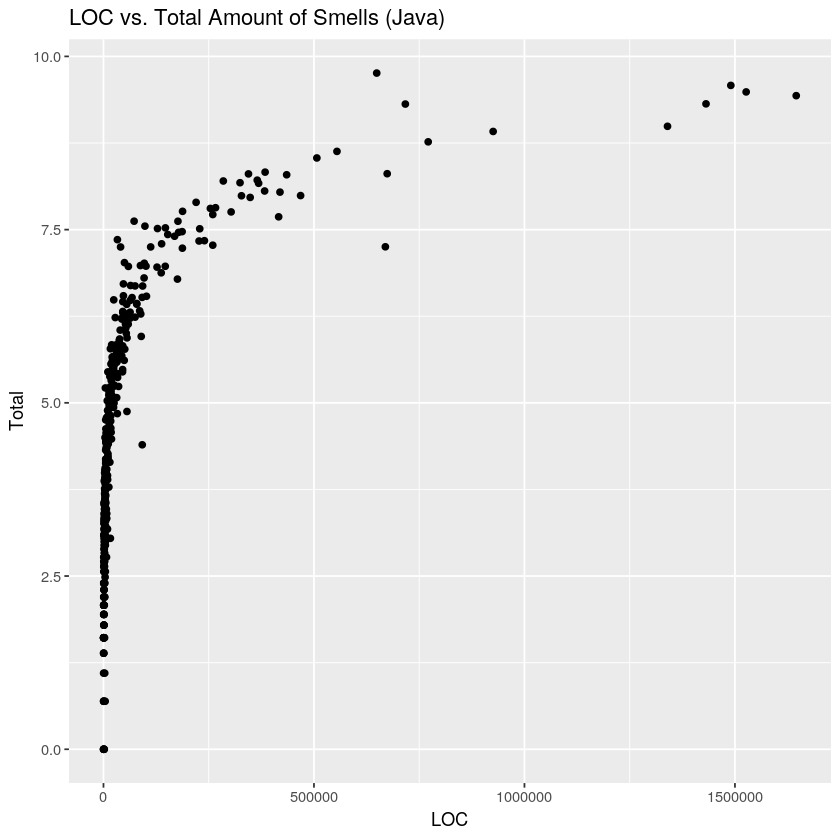

In [51]:
require(methods)
p <- ggplot(df_java_projects_training, aes(x = LOC, y = Total)) + geom_point()  + ggtitle("LOC vs. Total Amount of Smells (Java)")
print(p)

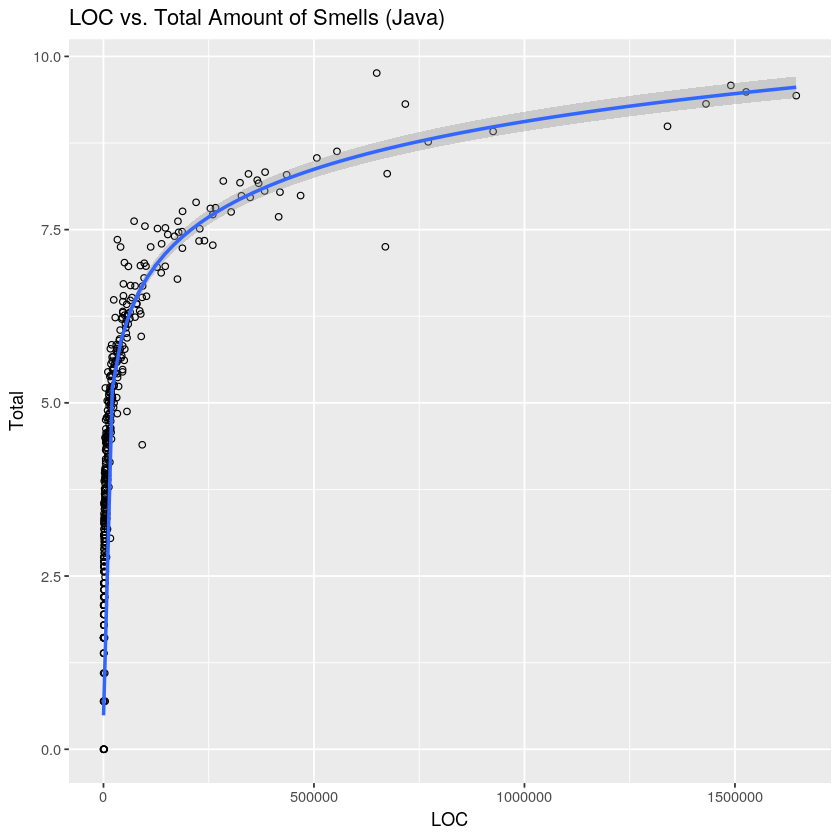

In [52]:
ggplot(df_java_projects_training, aes(LOC, Total))+
  geom_point(shape = 1) + stat_smooth(method = "lm", formula = y ~ log(x))  + ggtitle("LOC vs. Total Amount of Smells (Java)")

In [53]:
NROW(df_java_projects_training)

[1] 388

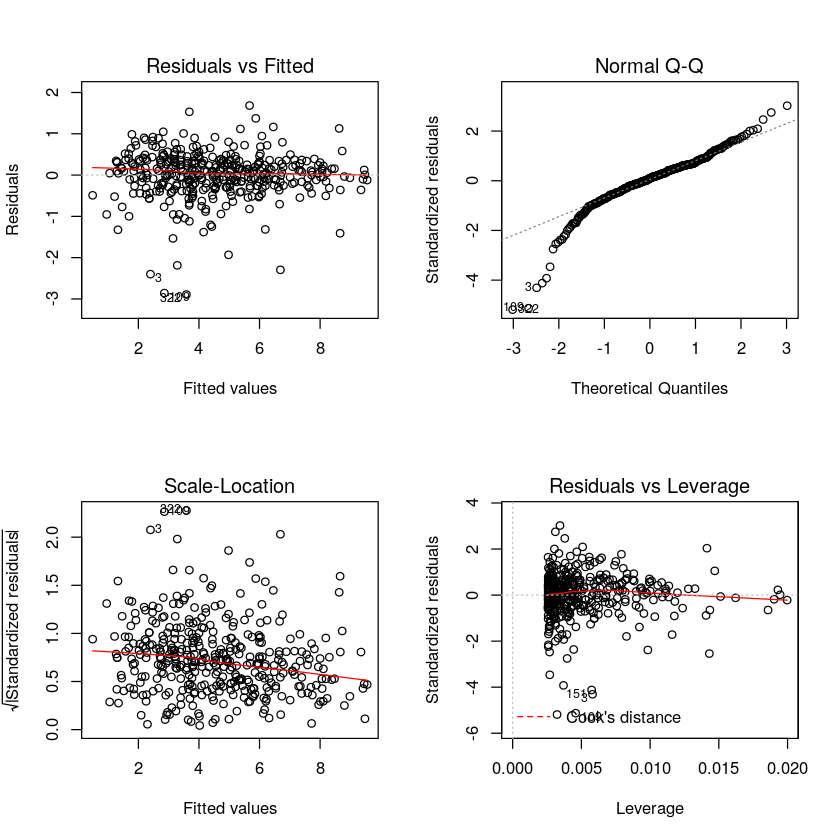

In [54]:
fit <- lm(Total ~ log(LOC), data=df_java_projects_training)
par(mfrow=c(2,2))
plot(fit)

In [55]:
rownames(df_java_projects_training) <- NULL

In [56]:
#df_java_projects_training <- df_java_projects_training[-c(3, 145, 86, 243, 81, 106, 313, 16, 114),]

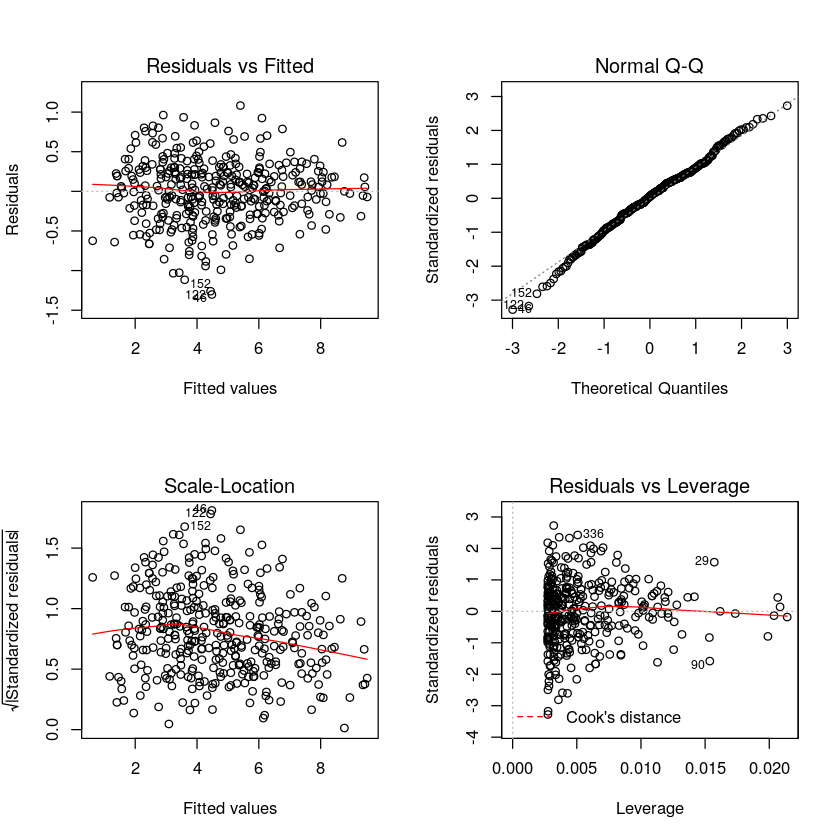

In [57]:
test <- df_java_projects_training[-c(313, 106, 145, 3, 86, 243, 16, 81, 114, 248, 234, 274, 113, 48, 290, 109, 262, 164, 232, 275, 293, 347),]
fit <- lm(Total ~ log(LOC), data=test)
par(mfrow=c(2,2))
plot(fit)

In [58]:
df_java_projects_training <- test

In [59]:
NROW(test)

[1] 366

In [60]:
fit <- lm(test$Total ~ log(test$LOC))

In [61]:
residuals <- resid(fit)

In [62]:
shapiro.test(residuals)


	Shapiro-Wilk normality test

data:  residuals
W = 0.99282, p-value = 0.0771


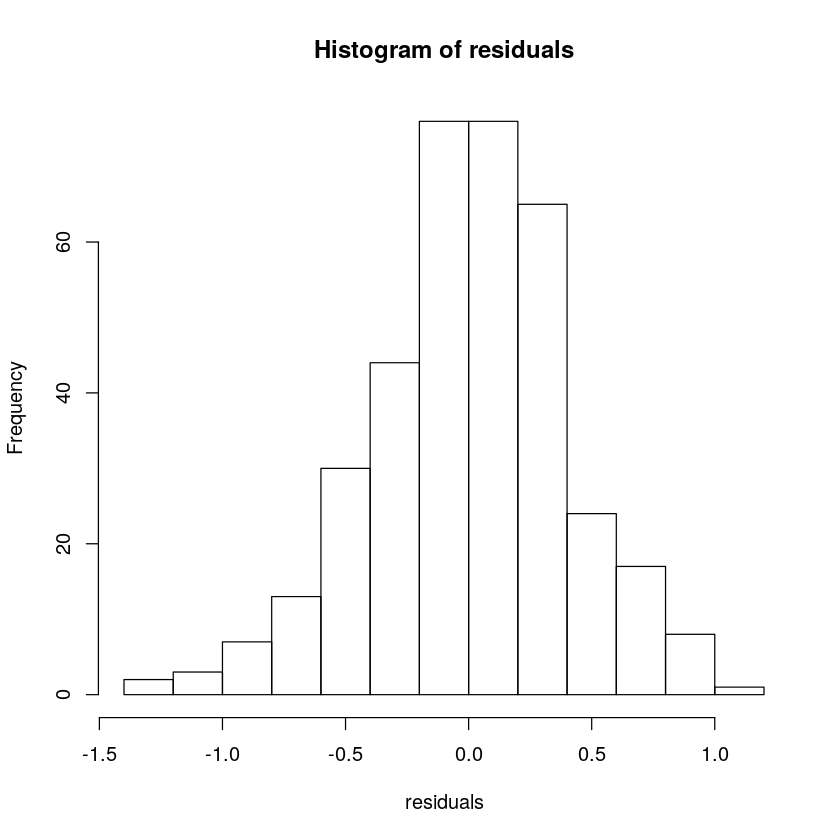

In [63]:
hist(residuals)

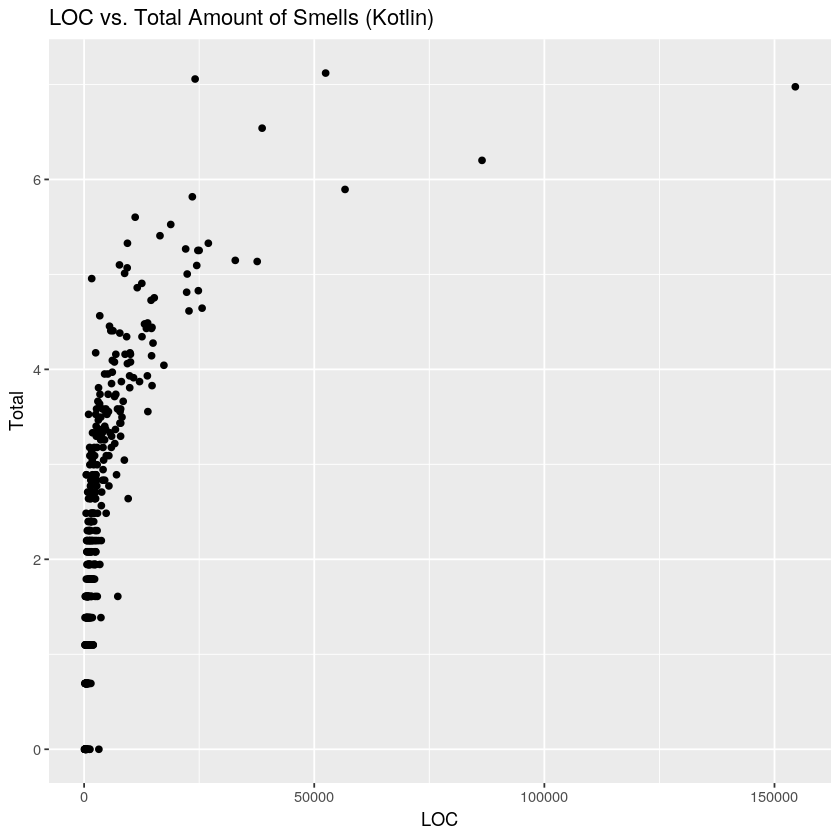

In [64]:
require(methods)
p <- ggplot(df_kotlin_projects_training, aes(x = LOC, y = Total)) + geom_point()  + ggtitle("LOC vs. Total Amount of Smells (Kotlin)")
print(p)

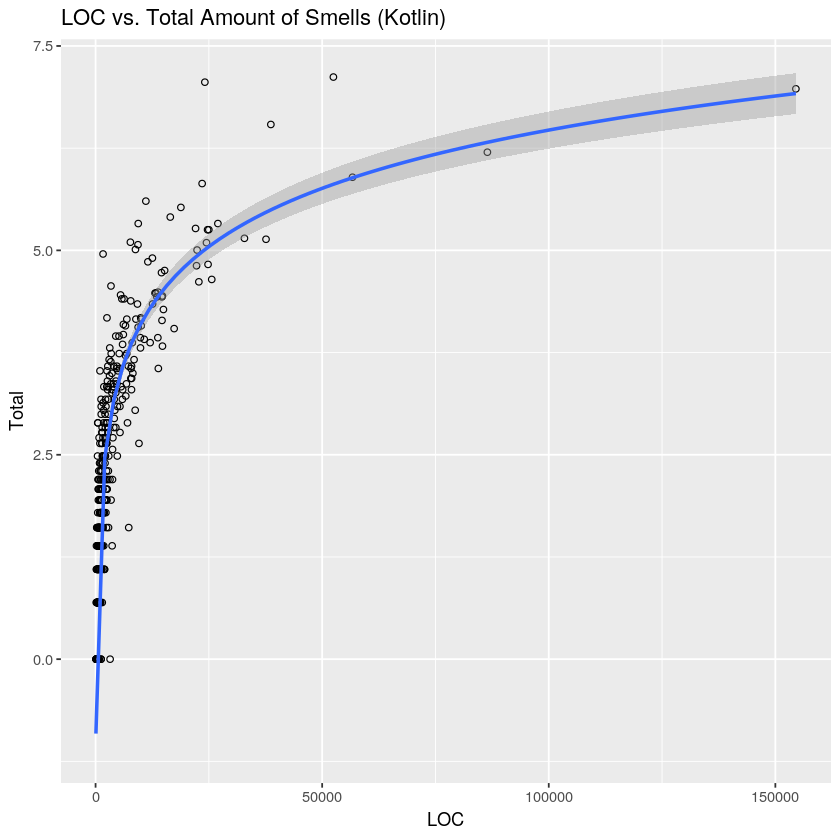

In [65]:
ggplot(df_kotlin_projects_training, aes(LOC, Total))+
  geom_point(shape = 1) + stat_smooth(method = "lm", formula = y ~ log(x))  + ggtitle("LOC vs. Total Amount of Smells (Kotlin)")

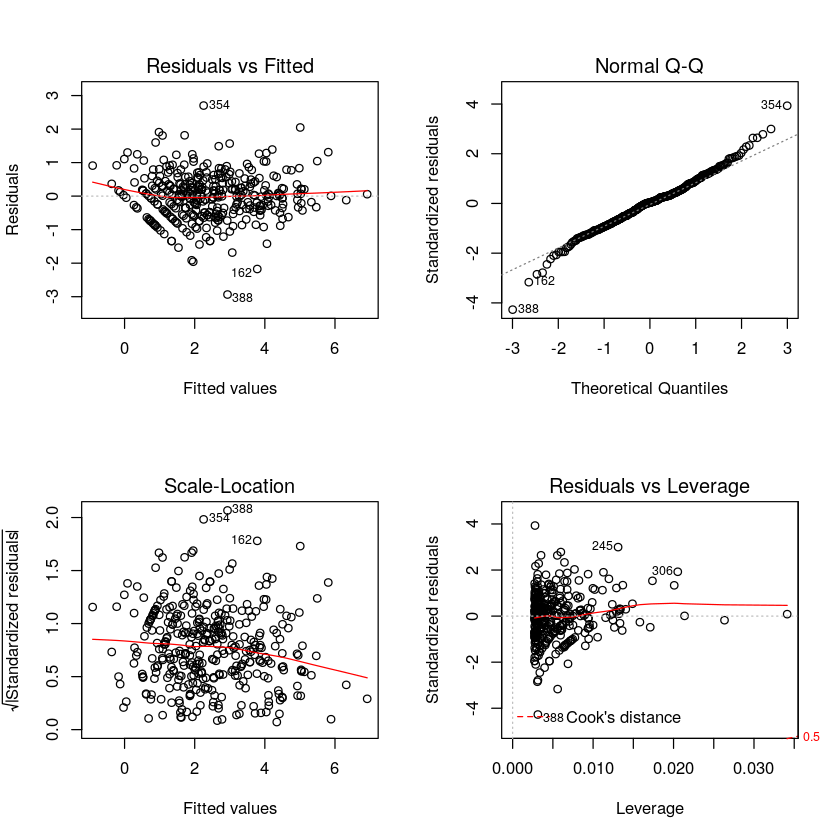

In [66]:
fit <- lm(Total ~ log(LOC), data=df_kotlin_projects_training)
par(mfrow=c(2,2))
plot(fit)

In [67]:
fit <- lm((df_kotlin_projects_training$Total) ~ log(df_kotlin_projects_training$LOC))
residuals <- resid(fit)
shapiro.test(residuals)


	Shapiro-Wilk normality test

data:  residuals
W = 0.98611, p-value = 0.001391


In [68]:
rownames(df_kotlin_projects_training) <- NULL

In [69]:
df_kotlin_projects_training <- df_kotlin_projects_training[-c(388, 354, 326, 356),]

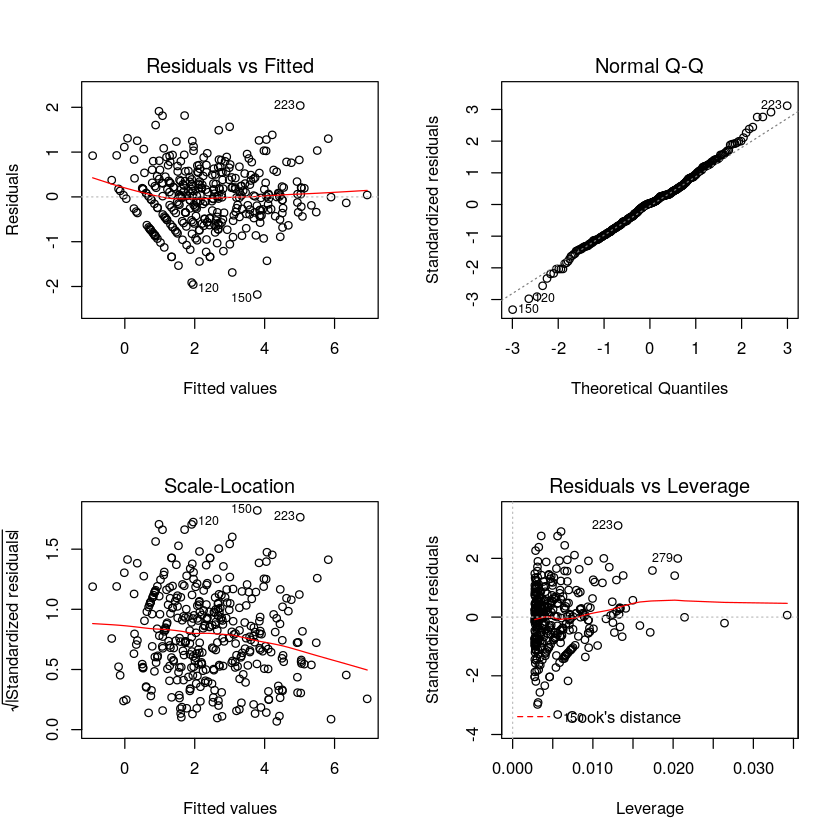

In [70]:
fit <- lm(Total ~ log(LOC), data=df_kotlin_projects_training)
par(mfrow=c(2,2))
plot(fit)

In [71]:
fit <- lm((df_kotlin_projects_training$Total) ~ log(df_kotlin_projects_training$LOC))
residuals <- resid(fit)
shapiro.test(residuals)


	Shapiro-Wilk normality test

data:  residuals
W = 0.99445, p-value = 0.2117


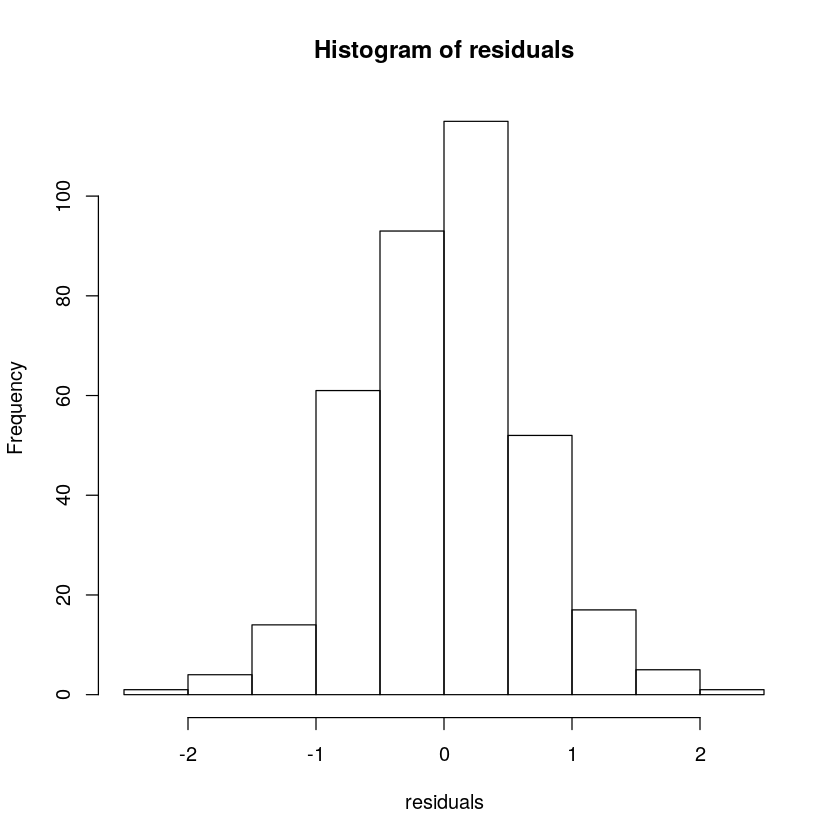

In [72]:
hist(residuals)

# ANCOVA Analysis

In [73]:
NROW(df_java_projects_training)
NROW(df_kotlin_projects_training)

[1] 366

[1] 363

In [74]:
df_java_projects_training["Language"] <- 1
df_kotlin_projects_training["Language"] <- 0
java_kotlin_df = data.frame(rbind(cbind(df_java_projects_training$Language, df_java_projects_training$Total, df_java_projects_training$LOC),cbind(df_kotlin_projects_training$Language, df_kotlin_projects_training$Total, df_kotlin_projects_training$LOC)))
java_kotlin_df <- setNames(java_kotlin_df, c("Language","Total","LOC"))

In [75]:
head(java_kotlin_df)

Language,Total,LOC
1,4.787492,7259
1,4.430817,9987
1,6.192362,54505
1,3.988984,2795
1,3.332205,3342
1,2.397895,873


In [76]:
rownames(test) <- NULL

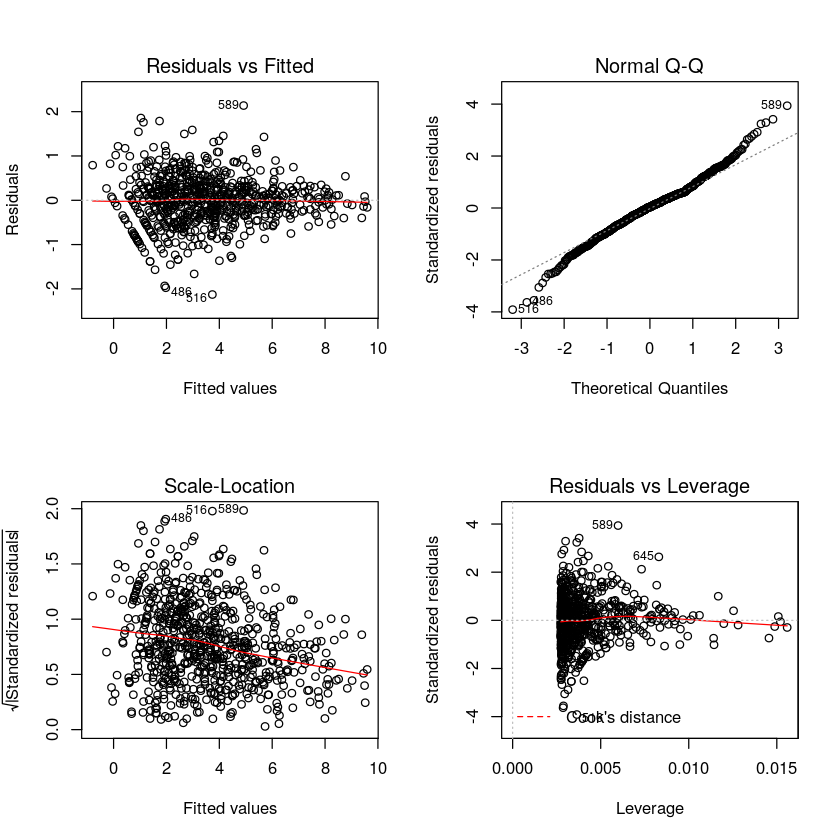

In [77]:
fit <- lm(Total ~ Language +  log(LOC), data= java_kotlin_df)
par(mfrow=c(2,2))
plot(fit)

In [121]:
test <- java_kotlin_df[-c(589, 516, 486, 649, 680, 597, 367, 648, 697, 543, 481, 558, 507, 645),]
NROW(test)

[1] 715

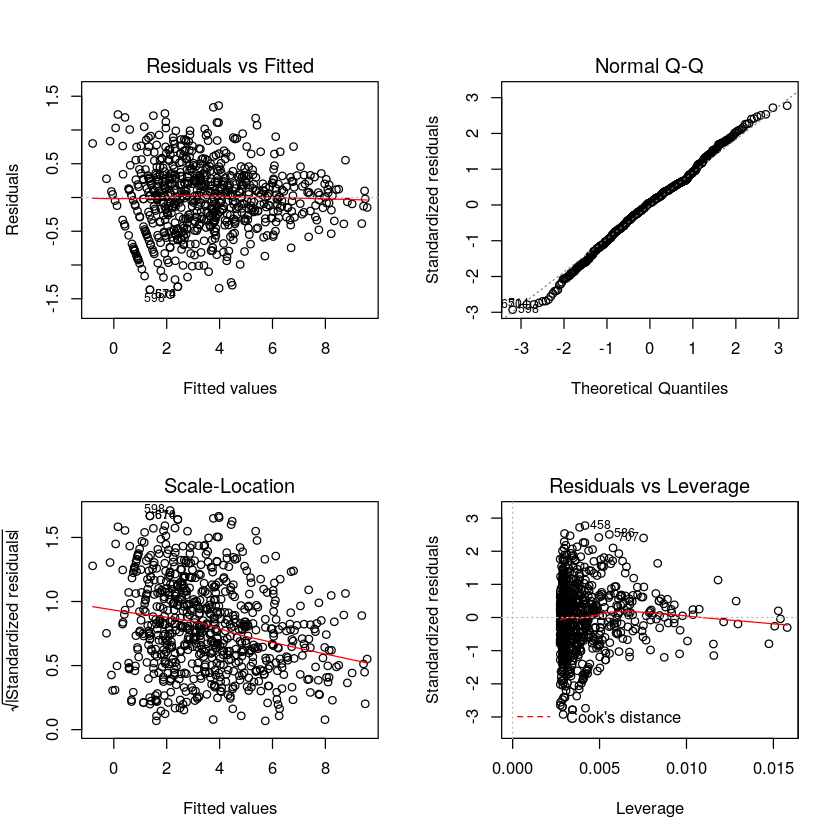

In [123]:
fit <- lm(test$Total ~ test$Language +  log(test$LOC), data= test)
par(mfrow=c(2,2))
plot(fit)

In [124]:
java_kotlin_df <- test

In [125]:
java_kotlin_df$Language <- factor(java_kotlin_df$Language, label = c("Kotlin", "Java"))

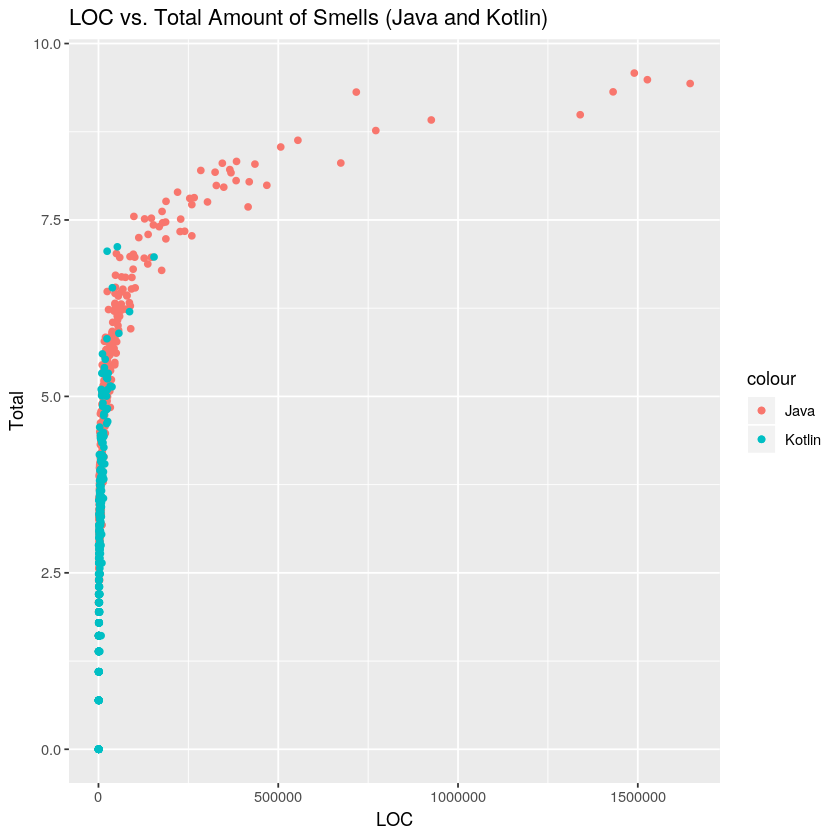

In [126]:
LOC <- df_java_projects_training$LOC
Total <- df_java_projects_training$Total

ggplot() +
  geom_point(data=df_java_projects_training, aes(LOC, Total, color= 'Java')) +
  geom_point(data=df_kotlin_projects_training, aes(df_kotlin_projects_training$LOC, df_kotlin_projects_training$Total, color= 'Kotlin')) + ggtitle("LOC vs. Total Amount of Smells (Java and Kotlin)")

In [127]:
java_kotlin_total <- java_kotlin_df$Total
java_kotlin_language <- java_kotlin_df$Language
java_kotlin_loc <- java_kotlin_df$LOC
aggregate(java_kotlin_total, by=list(java_kotlin_language), FUN=mean)

Group.1,x
Kotlin,2.404948
Java,4.632400


In [130]:
result_of_ancova <- aov(java_kotlin_total ~ java_kotlin_language +  log(java_kotlin_loc), data = java_kotlin_df)
summary(result_of_ancova)

                      Df Sum Sq Mean Sq F value Pr(>F)    
java_kotlin_language   1  886.4   886.4    3663 <2e-16 ***
log(java_kotlin_loc)   1 1875.3  1875.3    7751 <2e-16 ***
Residuals            712  172.3     0.2                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [132]:
residuals <- resid(result_of_ancova)
shapiro.test(residuals)


	Shapiro-Wilk normality test

data:  residuals
W = 0.99536, p-value = 0.03021


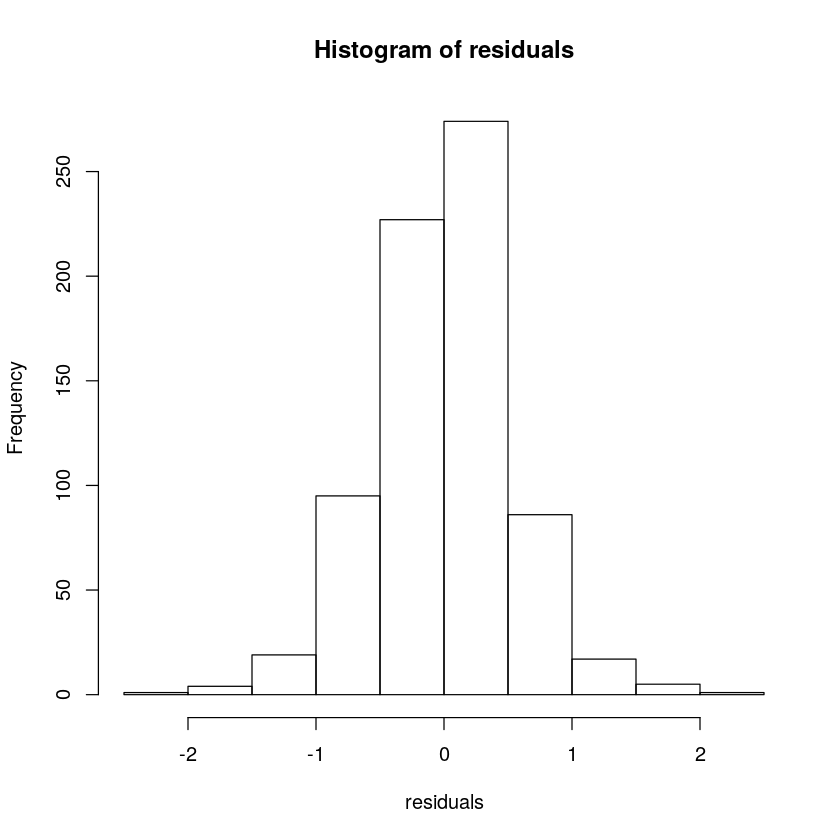

In [89]:
hist(residuals)

In [90]:
library(effects)

lattice theme set by effectsTheme()
See ?effectsTheme for details.


In [91]:
effect("java_kotlin_language", result_of_ancova)


 java_kotlin_language effect
java_kotlin_language
  Kotlin     Java 
5.387921 5.875602 

# Evaluation

In [92]:
RMSE = function(res){
  sqrt(mean((res)^2))
}

## Evaluation Java

In [93]:
rownames(df_java_projects_ran) <- NULL
java_projects_test_data <-  df_java_projects_ran[401:NROW(df_java_projects_ran),]

In [94]:
java_projects_test_data$Total <- log(java_projects_test_data$Total)
java_projects_test_data <- java_projects_test_data[java_projects_test_data$Total != 0, ]
java_projects_test_data <- java_projects_test_data[Reduce(`&`, lapply(java_projects_test_data, function(x) !is.na(x)  & is.finite(x))),]

In [95]:
head(java_projects_test_data)

,Project,LF,LPL,TMM,Total,Lifespan,Issues,LOC,Commits,Contributors,Stargazers
401,facebook/stetho,8,186,42,5.4638318,1403,44,22312,613,59,10491
402,EnterpriseQualityCoding/FizzBuzzEnterpriseEdition,21,3,0,3.1780538,2192,281,1387,161,36,9966
403,NYTimes/Store,3,114,27,4.9698133,726,30,14082,349,55,3397
404,shwenzhang/AndResGuard,0,38,17,4.0073332,1141,27,7120,393,22,5266
405,react-community/lottie-react-native,1,1,0,0.6931472,667,39,407,290,52,10214
406,alibaba/vlayout,0,224,25,5.5174529,636,100,15768,348,17,8725


In [96]:
summary(java_projects_test_data)

                            Project          LF                LPL         
 2dxgujun/AndroidTagGroup       :  1   Min.   :    0.00   Min.   :    0.0  
 81813780/AVLoadingIndicatorView:  1   1st Qu.:    0.00   1st Qu.:   17.0  
 aa112901/remusic               :  1   Median :    1.00   Median :   59.5  
 abel533/Mapper                 :  1   Mean   :   72.53   Mean   :  421.4  
 AbrahamCaiJin/CommonUtilLibrary:  1   3rd Qu.:    9.00   3rd Qu.:  256.0  
 Activiti/Activiti              :  1   Max.   :19638.00   Max.   :12760.0  
 (Other)                        :574                                       
      TMM             Total            Lifespan        Issues      
 Min.   :   0.0   Min.   : 0.6931   Min.   : 180   Min.   :   0.0  
 1st Qu.:   4.0   1st Qu.: 3.1244   1st Qu.: 976   1st Qu.:  18.0  
 Median :  15.0   Median : 4.3306   Median :1445   Median :  47.5  
 Mean   : 112.3   Mean   : 4.5209   Mean   :1527   Mean   : 107.0  
 3rd Qu.:  69.0   3rd Qu.: 5.9182   3rd Qu.:2010   3

In [133]:
fit <- lm(java_projects_test_data$Total ~ log(java_projects_test_data$LOC))

In [134]:
residuals <- residuals(fit)

In [135]:
RMSE(residuals)

[1] 0.534696

Warning message:
“Removed 13 rows containing non-finite values (stat_smooth).”

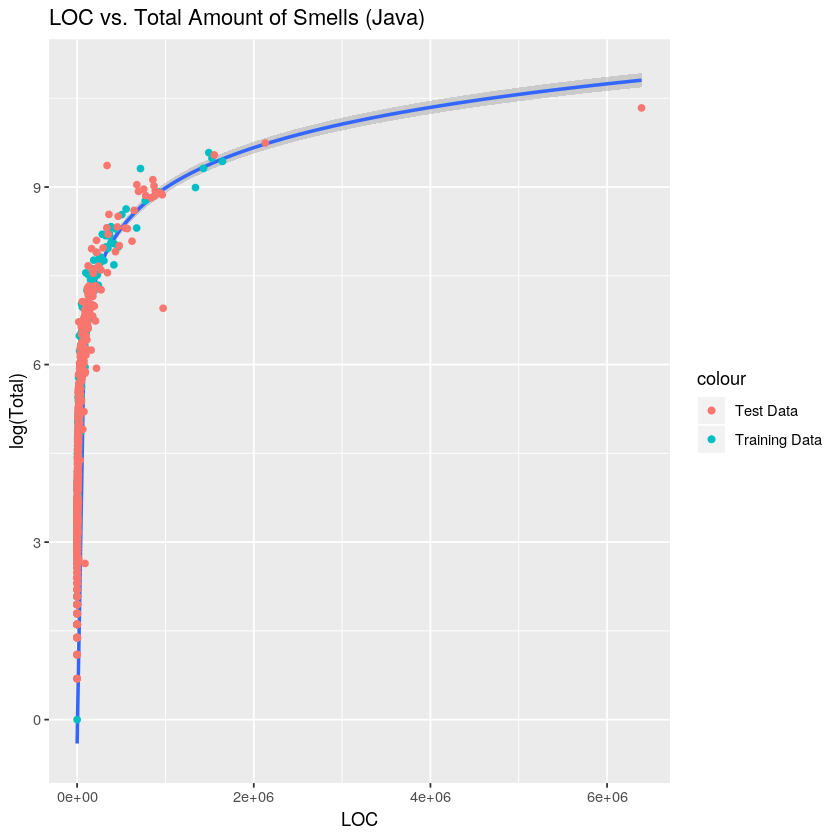

In [100]:
ggplot(df_java_projects_ran, aes(LOC, log(Total)))+
  stat_smooth(method = "lm", formula = y ~ log(x)) +
  geom_point(data=df_java_projects_training, aes(df_java_projects_training$LOC, df_java_projects_training$Total, color= 'Training Data')) +
  geom_point(data=java_projects_test_data, aes(java_projects_test_data$LOC, java_projects_test_data$Total, color= 'Test Data')) +
  ggtitle("LOC vs. Total Amount of Smells (Java)")